In [123]:
both = {
    'file_name': [],
    'latex': []
}
left = {
    'file_name': [],
    'latex': []
}
right = {
    'file_name': [],
    'latex': []
}
with open('/opt/ml/input/data/train_dataset/gt.txt', "r") as ff:
    for idx, line in enumerate(ff):
        image_name, latex = line.replace("\n","").split("\t")
        latex_list = latex.split()
#         if idx == 291:
#             print(latex.split()[-1] == '\\right.')
#             print('뭐지', "\\left." in latex, "\\right." in latex)
#             if "\left." in latex:
#                 print(1)
#                 if "\right." in latex:
#                     print(2)
#                 else:
#                     print(3)
#             elif "\right." in latex:
#                 print(4)
#             else:
#                 print(5)
        if "\\left." in latex:
            if "\\right." in latex:
#                 print('B', image_name)
                target = both
            else:
#                 print('L', image_name)
                target = left
        elif "\\right." in latex:
#             print('R', image_name)
            target = right
        else:
            continue
        target['file_name'].append(image_name)
        target['latex'].append(latex)

In [124]:
len(left['latex']), len(right['latex']), len(both['latex']), len(left['latex']) + len(right['latex']) + len(both['latex'])

(1095, 2184, 74, 3353)

In [ ]:
'''
10만 데이터 => 1000개 데이터 = 1% 
- \left.만 => 1095 => 1% => 맨 왼쪽이 아닌것 95개 => 9% (전체 0.09%)
- \right.만 => 2184 => 2% => 맨 오른쪽 아닌것 82개 => 4% (전체 0.08%)
- 둘다 => 74 => 0.07%
'''

In [131]:
left_cnt1 = 0
for latex in left['latex']:
    if '\\left.' != latex.split()[0]:
        left_cnt1 += 1
#         print(left_cnt1, latex)
print(left_cnt1)

95


In [132]:
right_cnt1 = 0
for latex in right['latex']:
    if '\\right.' != latex.split()[-1]:
        right_cnt1 += 1
#         print(right_cnt1, latex)
print(right_cnt1)

82


In [134]:
both_cnt1 = 0
for latex in both['latex']:
    if '\\left.' != latex.split()[0] or '\\both.' != latex.split()[-1]:
        both_cnt1 += 1
#         print(latex)
#         print(both_cnt1, latex)
print(both_cnt1)

74


In [147]:
for latex in both['latex']:
    if '\\left.' != latex.split()[0] and '\\right.' != latex.split()[-1]:
        print('Bx', latex.split()[0], latex.split()[-1])
    elif '\\left.' != latex.split()[0]:
        print('Lx', latex.split()[0])
    elif '\\right.' != latex.split()[-1]:
        print('Rx', latex.split()[-1])
#     else:
#         # 양 끝에 정답
#         print("?", latex.split()[0], latex.split()[-1])

Lx \epsilon
Lx \int
Bx r }
Bx < ;
Bx { }
Bx \epsilon \right\}
Bx \left( \right]
Bx \overline }
Bx \rightarrow }
Bx y c
Lx =
Bx \frac }
Rx \right\}
Lx \epsilon
Lx 8
Bx \epsilon \right\}
Lx ,
Bx P \right]
Lx =
Rx =
Lx ,
Lx Y
Rx }
Lx \lim


In [102]:
with open('/opt/ml/input/data/train_dataset/gt.txt', "r") as ff:
    for idx, line in enumerate(ff):
        image_name, latex = line.replace("\n","").split("\t")
        if "\left." in latex:
            if "\right." in latex:
                target = both
            else:
                target = left
        elif "\right." in latex:
            target = right
        else:
            continue
        target['file_name'].append(image_name)
        target['latex'].append(latex)

In [69]:
len(left['latex']), len(right['latex']), len(both['latex'])

(1169, 0, 0)

In [66]:
f_name = left['file_name']
latex = left['latex']
for i in range(len(left['latex'])):
    if latex[i].split()[0] == '\left.' or latex[i].split()[-1] == '\right.':
        continue
    print(i, f_name[i], latex[i])

0 train_00042.jpg x \left. \right) > 0
10 train_00918.jpg \epsilon = < T ; I R ^ { l } ; \left. \left( X \left( 5 \right) \right) _ { t \in T } ; \left( e \left( t \right) _ { t \in T } ; \tau _ { t \in T } \right\} \right.
17 train_01596.jpg \int _ { \alpha } ^ { \beta } \left( x - \alpha \right) \left( x - \beta \right) d x = \left[ \left. \frac { \left( x - \alpha \right) ^ { 2 } } { 2 } \left( x - \beta \right) \right] _ { \alpha } ^ { \beta } - \int _ { \alpha } ^ { \beta } \frac { \left( x - \alpha \right) ^ { 2 } } { 2 } d x \right.
35 train_02894.jpg - \left. t ^ { 2 } - 2 ^ { - a } t + \left( 2 ^ { - a - 1 } \right) ^ { 2 } \right\} + \left( 2 ^ { - a - 1 } \right) ^ { 2 } + 1
43 train_03516.jpg r _ { V W } = \frac { \sum _ { i = 1 } ^ { n } \left( v _ { i } - \overline { v } \right) \left( w _ { i } - \overline { w } \right) } { \left. \sqrt { \left[ \sum _ { i = 1 } ^ { n } \left( v _ { i } - \overline { v } \right) ^ { 2 } \right] \left[ \sum _ { i = 1 } ^ { n } \left( w _ 

In [ ]:
'''
47: \left|
72: \left\|
168: \left[
169: \left.
172: \left\{
226: \left(

24: \right|
68: \right.
122: \right\|
134: \right)
142: \right\}
187: \right]

| : 47, 24
\| : 72, 122
[ , ] : 168, 187
. : 169, 68
\{ : 172, 142
( , ) : 226, 134

Leftarrow
Rightarrow
leftrightarrow
Leftrightarrow
'''

In [281]:
RIGHT_BRAKETS['\\right\\}']

-5

In [290]:
from collections import defaultdict
unBalance = dict()
LEFT_BRAKETS = {
#     token: idx for idx, token in enumerate(['\\left.', '\\left|', '\\left\\|', '\\left[', '\\left\\{', '\\left('])
    token: idx for idx, token in enumerate(['\\left|', '\\left\\|', '\\left[', '\\left\\{', '\\left('])
}
RIGHT_BRAKETS = {
#     token: -idx for idx, token in enumerate(['\\right.', '\\right|', '\\right\\|', '\\right]', '\\right\\}', '\\right)'])
    token: -idx for idx, token in enumerate(['\\right|', '\\right\\|', '\\right]', '\\right\\}', '\\right)'])
}
with open("/opt/ml/input/data/train_dataset/gt.txt") as sample:
        for line in tqdm(sample):
            val = 0
            lst = []
            f_name, latex = line.replace("\n","").split("\t")
            for idx, token in enumerate(latex.split()):
                if token in LEFT_BRAKETS:
                    val -= 1
                    lst.append(token)
                elif token in RIGHT_BRAKETS:
                    val += 1
                    if lst and lst[-1] in LEFT_BRAKETS and (not LEFT_BRAKETS[lst[-1]] or not RIGHT_BRAKETS[token] or LEFT_BRAKETS[lst[-1]] == -1*RIGHT_BRAKETS[token]) :
                        lst = lst [:-1]
                    else:
                        lst.append(token)
            balance[val] += 1
            if lst:
                unBalance[f_name] = (val, lst, latex)
#                 print(line)
#                 break
#             if val:
#                 print(line)
#                 units[val].append(u)



0it [00:00, ?it/s]

13296it [00:00, 132958.22it/s]

27345it [00:00, 135130.03it/s]

41735it [00:00, 137641.55it/s]

56830it [00:00, 141376.48it/s]

71847it [00:00, 143897.61it/s]

87323it [00:00, 146991.51it/s]

100000it [00:00, 146942.79it/s]

In [292]:
len(unBalance) # 10만 => 0.36%

360

In [295]:
for f_name, (val, lst, latex) in unBalance.items():
    if '\\left.' in lst or '\\right.' in lst:
        print(f_name, val)
        print(lst)
        print(latex)

train_00918.jpg 0
['\\left.', '\\left(', '\\right\\}', '\\right.']
\epsilon = < T ; I R ^ { l } ; \left. \left( X \left( 5 \right) \right) _ { t \in T } ; \left( e \left( t \right) _ { t \in T } ; \tau _ { t \in T } \right\} \right.
train_00979.jpg 1
['\\right.']
2 n \left\{ 6 + n d - d \right\} = 6 n + 2 n ^ { 2 } d - n d \right.
train_01039.jpg -1
['\\left.']
\left. ; \left( \tau \right) t \in T \ r i g h t >
train_12728.jpg 0
['\\left|', '\\left(', '\\right|', '\\right.']
\lim _ { r \to \infty } s u p \left| p \left( r \right) \left( y ^ { r } \left( t \right) - e \left( t \right) \right| = 0 \right.
train_22972.jpg 1
['\\right.']
\log 2 ^ { 2 x } > \log 5 ^ { 1 - 2 x } , 2 x \log 2 > \left( 1 - 2 x \right) \log { 5 } \right.
train_25308.jpg 1
['\\right.']
K \left( x , t \right) = \ l e f t { \begin{matrix} \frac { 1 } { 2 } \left( 1 - x \right) \left( t + 1 \right) , x > t \\ \frac { 1 } { 2 } \left( 1 - t \right) \left( x + 1 \right) , x < t \end{matrix} \right.
train_28107.jpg 0


In [245]:
temp_list = line.replace("\n","").split("\t")[1].split()
temp_list

['X', '=', '\\left\\{', 'a', ',', 'b', ',', 'c', '\\right\\}']

In [246]:
temp_list[2], temp_list[-1]

('\\left\\{', '\\right\\}')

In [249]:
temp_list[2], temp_list[2][1:], temp_list[2][2:], temp_list[2][3:], temp_list[2][4:], temp_list[2][5:], temp_list[2][6:]

('\\left\\{', 'left\\{', 'eft\\{', 'ft\\{', 't\\{', '\\{', '{')

In [255]:
temp_list[2][4:], temp_list[2][5:], temp_list[2][6:]

('t\\{', '\\{', '{')

In [254]:
temp_list[-1], temp_list[-1][1:], temp_list[-1][2:], temp_list[-1][3:], temp_list[-1][4:], temp_list[-1][5:], temp_list[-1][6:]

('\\right\\}', 'right\\}', 'ight\\}', 'ght\\}', 'ht\\}', 't\\}', '\\}')

In [257]:
temp_list[2][5:], temp_list[-1][6:], temp_list[2][5:] == temp_list[-1][6:]

('\\{', '\\}', False)

In [ ]:
from collections import defaultdict
balance = defaultdict(int)
units = defaultdict(list)
# | : 47, 24
# \| : 72, 122
# [ , ] : 168, 187
# . : 169, 68
# \{ : 172, 142
# ( , ) : 226, 134
LEFT_BRAKETS = set(['\\left[', '\\left.', '\\left\{', '\\left('])
RIGHT_BRAKETS = set(['\\right]', '\\right.', '\\right\}', '\\right)'])
with open("/opt/ml/input/data/train_dataset/gt.txt") as sample:
        for line in tqdm(sample):
            val = 0
            u = []
#             ul = []
#             ur = []
            for idx, token in enumerate(line.replace("\n","").split("\t")[1].split()):
                if token in LEFT_BRAKETS:
                    val -= 1
                    u.append(token)
                elif token in RIGHT_BRAKETS:
                    val += 1
                    u.append(token)
            balance[val] += 1
            if val:
                print(line)
                units[val].append(u)

In [224]:
balance.items()

dict_items([(0, 99601), (1, 160), (-1, 224), (-2, 12), (2, 3)])

In [178]:
from collections import defaultdict
inv_l_idx = defaultdict(int)
inv_r_idx = defaultdict(int)
with open("/opt/ml/input/data/train_dataset/gt.txt") as sample:
        for line in tqdm(sample):
            for idx, token in enumerate(line.replace("\n","").split("\t")[1].split()):
                if token == '\\left.':
                    inv_l_idx[idx] += 1
                elif token == '\\right.':
                    inv_r_idx[idx] += 1



0it [00:00, ?it/s]

18358it [00:00, 183573.17it/s]

37422it [00:00, 185636.35it/s]

57369it [00:00, 189577.65it/s]

77705it [00:00, 193509.94it/s]

98403it [00:00, 197362.45it/s]

100000it [00:00, 195708.63it/s]

In [198]:
from collections import defaultdict
inv_l_idx = defaultdict(int)
inv_r_idx = defaultdict(int)
next_token = defaultdict(int)
with open("/opt/ml/input/data/train_dataset/gt.txt") as sample:
        for line in tqdm(sample):
            next_p = False
            for idx, token in enumerate(line.replace("\n","").split("\t")[1].split()):
                if next_p:
                    next_token[token] += 1
                    next_p = False
                if token == '\\left.':
                    inv_l_idx[idx] += 1
                elif token == '\\right.':
                    inv_r_idx[idx] += 1
                    next_p = True
            if next_p:
                next_token['END'] += 1
                next_p = False



0it [00:00, ?it/s]

17518it [00:00, 175178.08it/s]

35756it [00:00, 177277.90it/s]

54626it [00:00, 180553.36it/s]

73813it [00:00, 183804.20it/s]

93404it [00:00, 187274.14it/s]

100000it [00:00, 187418.07it/s]

In [199]:
sort_next_token = sorted(list(next_token), key=lambda x: x[1])

IndexError: string index out of range

In [202]:
next_token_list = list(next_token.items()) # 끝 2162 기타 170 => 4%
next_token_list

[('END', 2162),
 ('|', 2),
 (',', 11),
 ('\\right.', 55),
 (';', 3),
 ('}', 45),
 ('\\\\', 5),
 ('\\end{matrix}', 5),
 ('=', 4),
 ('m', 1),
 ('y', 1),
 ('\\right]', 1),
 ('\\right\\}', 2),
 ('\\left.', 5),
 (':', 6),
 ('-', 4),
 ('\\max', 1),
 ('+', 2),
 ('\\leq', 4),
 ('t', 2),
 ('\\Leftrightarrow', 1),
 ('\\right|', 1),
 ('a', 2),
 ('\\frac', 2),
 ('\\times', 1),
 ('\\rightarrow', 1),
 ('\\tau', 1),
 ('\\left(', 1),
 ('>', 1)]

In [203]:
num_cnt = 0
for _, n in next_token_list[1:]:
    num_cnt += n
print(num_cnt)

170


In [185]:
sort_l = sorted(list(inv_l_idx.items()))
sort_l

[(0, 1053),
 (1, 55),
 (2, 11),
 (3, 8),
 (4, 2),
 (5, 2),
 (6, 4),
 (7, 7),
 (8, 4),
 (9, 5),
 (10, 5),
 (11, 1),
 (12, 3),
 (14, 1),
 (15, 2),
 (16, 2),
 (17, 3),
 (18, 3),
 (19, 2),
 (21, 3),
 (22, 2),
 (23, 2),
 (25, 3),
 (26, 1),
 (28, 3),
 (31, 1),
 (32, 4),
 (35, 1),
 (41, 1),
 (42, 1),
 (46, 2),
 (49, 1),
 (54, 2),
 (60, 1),
 (75, 1),
 (77, 1),
 (84, 1)]

In [204]:
num_cnt2 = 0 # 끝 1053 vs 기타 151 => 14%
for _, n in sort_l[1:]:
    num_cnt2 += n
print(num_cnt2)

151


In [186]:
sort_r = sorted(list(inv_r_idx.items()))
sort_r

[(1, 2),
 (3, 31),
 (4, 75),
 (5, 54),
 (6, 116),
 (7, 87),
 (8, 108),
 (9, 83),
 (10, 88),
 (11, 76),
 (12, 86),
 (13, 45),
 (14, 76),
 (15, 63),
 (16, 79),
 (17, 45),
 (18, 62),
 (19, 60),
 (20, 68),
 (21, 60),
 (22, 45),
 (23, 54),
 (24, 52),
 (25, 54),
 (26, 37),
 (27, 30),
 (28, 30),
 (29, 32),
 (30, 32),
 (31, 47),
 (32, 54),
 (33, 33),
 (34, 40),
 (35, 24),
 (36, 16),
 (37, 23),
 (38, 28),
 (39, 15),
 (40, 14),
 (41, 10),
 (42, 17),
 (43, 20),
 (44, 17),
 (45, 13),
 (46, 12),
 (47, 10),
 (48, 9),
 (49, 14),
 (50, 6),
 (51, 12),
 (52, 10),
 (53, 5),
 (54, 8),
 (55, 11),
 (56, 5),
 (57, 10),
 (58, 6),
 (59, 12),
 (60, 7),
 (61, 5),
 (62, 8),
 (63, 5),
 (64, 2),
 (65, 6),
 (66, 4),
 (67, 7),
 (68, 4),
 (69, 11),
 (71, 3),
 (72, 1),
 (73, 1),
 (74, 2),
 (75, 1),
 (76, 2),
 (77, 1),
 (78, 2),
 (79, 1),
 (80, 3),
 (81, 1),
 (82, 1),
 (84, 3),
 (85, 3),
 (86, 1),
 (87, 1),
 (93, 1),
 (94, 1),
 (96, 4),
 (98, 2),
 (99, 1),
 (106, 1),
 (110, 1),
 (133, 1),
 (138, 1),
 (140, 1),
 (152, 1)

In [1]:
import torch
import os
from train import id_to_string
from metrics import word_error_rate, sentence_acc
from checkpoint import load_checkpoint
from torchvision import transforms
from dataset import LoadEvalDataset, collate_eval_batch, START, PAD
from flags import Flags
from utils import get_network, get_optimizer
import csv
from torch.utils.data import DataLoader
import argparse
import random
from tqdm import tqdm

In [2]:
import numpy as np
import pandas as pd
import pdb

# DataFrame 생성

In [3]:
# dataframe 생성 & list 생성
def create_df(gt_path:str):
    data = dict()
    data['name'] = []
    data['latex_str'] = []
    data['latex'] = []
    all_latex_list = []
    invisible_list = []
    with open(gt_path) as f:
        for idx,line in enumerate(f):
            image_name, latex = line.replace("\n","").split("\t")
            data['name'].append(image_name)
            data['latex_str'].append(latex) # 추가 4
            latex=latex.split(" ")
            if "\\left." in latex or "\\right." in latex:
                invisible_list.append(idx)
            data['latex'].append(latex)
            all_latex_list += latex
    df = pd.DataFrame.from_dict(data)
    return df, all_latex_list, invisible_list

In [4]:
df, all_latex_list, invisible_list = create_df(
#     default_image_path="/opt/ml/input/data/train_dataset/256_64/",
    gt_path="/opt/ml/input/data/train_dataset/gt.txt",
)

In [5]:
df

name                                          latex_str  \
0      train_00000.jpg                                   4 \times 7 = 2 8   
1      train_00001.jpg                                      a ^ { x } > q   
2      train_00002.jpg                                         8 \times 9   
3      train_00003.jpg  \sum _ { k = 1 } ^ { n - 1 } b _ { k } = a _ {...   
4      train_00004.jpg                                      I = d q / d t   
...                ...                                                ...   
99995  train_99995.jpg               P \left( X = x _ { i } \right) = p i   
99996  train_99996.jpg  = 2 a ^ { 2 } + 2 b ^ { 2 } + 2 c ^ { 2 } - 2 ...   
99997  train_99997.jpg                                            y - 3 =   
99998  train_99998.jpg  \int _ { 0 } ^ { k } \frac { e ^ { x } } { e ^...   
99999  train_99999.jpg                                        5 ! = 1 2 0   

                                                   latex  
0                                [4, \times, 7, =, 2, 8]  
1                                  [a, ^, {, x, }, >, q]  
2                                         [8, \times, 9]  
3      [\sum, _, {, k, =, 1, }, ^, {, n, -, 1, }, b, ...  
4                                  [I, =, d, q, /, d, t]  
...                                                  ...  
99995  [P, \left(, X, =, x, _, {, i, }, \right), =, p...  
99996  [=, 2, a, ^, {, 2, }, +, 2, b, ^, {, 2, }, +, ...  
99997                                       [y, -, 3, =]  
99998  [\int, _, {, 0, }, ^, {, k, }, \frac, {, e, ^,...  
99999                                 [5, !, =, 1, 2, 0]  

[100000 rows x 3 columns]

In [6]:
invisible_df = df.loc[invisible_list]
invisible_df

name                                          latex_str  \
42     train_00042.jpg                               x \left. \right) > 0   
56     train_00056.jpg                    7 \times 5 = 3 5 \left( \right.   
96     train_00096.jpg  = \left( x + 2 y + z \right) \left( x ^ { 2 } ...   
115    train_00115.jpg  = 2 7 - 9 \left( \alpha + \beta + \gamma \righ...   
244    train_00244.jpg                          B = \left\{ x | x \right.   
...                ...                                                ...   
99828  train_99828.jpg               + \left( - \frac { 7 } { 4 } \right.   
99849  train_99849.jpg  \left( \left( f \left( t _ { 1 } \right) , g \...   
99888  train_99888.jpg  \left. \frac { \overline { x } _ { n } , S _ {...   
99901  train_99901.jpg  \left. \begin{matrix} a & b \\ c & d \end{matr...   
99937  train_99937.jpg                         \left\{ y | y \neq \right.   

                                                   latex  
42                            [x, \left., \right), >, 0]  
56              [7, \times, 5, =, 3, 5, \left(, \right.]  
96     [=, \left(, x, +, 2, y, +, z, \right), \left(,...  
115    [=, 2, 7, -, 9, \left(, \alpha, +, \beta, +, \...  
244                    [B, =, \left\{, x, |, x, \right.]  
...                                                  ...  
99828   [+, \left(, -, \frac, {, 7, }, {, 4, }, \right.]  
99849  [\left(, \left(, f, \left(, t, _, {, 1, }, \ri...  
99888  [\left., \frac, {, \overline, {, x, }, _, {, n...  
99901  [\left., \begin{matrix}, a, &, b, \\, c, &, d,...  
99937                  [\left\{, y, |, y, \neq, \right.]  

[3353 rows x 3 columns]

In [7]:
invisible_dict = {x:1for x in invisible_list}
len(invisible_dict.items())

3353

In [8]:
df.iloc[0]

name                 train_00000.jpg
latex_str           4 \times 7 = 2 8
latex        [4, \times, 7, =, 2, 8]
Name: 0, dtype: object

# 모델

In [9]:
from dataset import dataset_loader, START, PAD,load_vocab

In [10]:
import sys
csv.field_size_limit(sys.maxsize)

131072

In [45]:
################################# paresr 부분 대체하는 코드 ########################
# 이후 parser에 접근 하는 코드 모두 알맞게 수정
cfg = dict()
cfg['checkpoint'] = '/opt/ml/code/log/satrn7/checkpoints/0060.pth'
cfg['max_sequence'] = 230
cfg['batch_size'] = 32
cfg['file_path'] = '/opt/ml/input/data/train_dataset/gt.txt'
cfg['input_dir'] = "/opt/ml/input/data/train_dataset/256_64/"
####################################################################################

# 1. 체크포인트 로드
is_cuda = torch.cuda.is_available()
checkpoint = load_checkpoint(cfg['checkpoint'], cuda=is_cuda) #checkpoint = load_checkpoint(parser.checkpoint, cuda=is_cuda)

# 2. 체크포인트로부터 옵션 로드 & seed pix
options = Flags(checkpoint["configs"]).get()
torch.manual_seed(options.seed)
random.seed(options.seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

hardware = "cuda" if is_cuda else "cpu"
device = torch.device(hardware)
print("--------------------------------")
print("Running {} on device {}\n".format(options.network, device))

model_checkpoint = checkpoint["model"]
if model_checkpoint:
    print(
        "[+] Checkpoint\n",
        "Resuming from epoch : {}\n".format(checkpoint["epoch"]),
    )
print(options.input_size.height)

##################################################################
dummy_gt = "\sin " * cfg['max_sequence']  # set maximum inference sequence
root = os.path.join(os.path.dirname(cfg['file_path']), "256_64")
# data = []
test_data = []
gt = []
with open(cfg['file_path'], "r") as fd:
    reader = csv.reader(fd, delimiter="\t")
    for i, x in enumerate(reader):
        test_data.append([os.path.join(root, x[0]), x[0], dummy_gt])
        gt.append(x[1])
print(f'# of data: {i+1} & # of test_data: {len(test_data)}')
transformed = transforms.ToTensor()

test_dataset = LoadEvalDataset(
    test_data,
    checkpoint["token_to_id"],
    checkpoint["id_to_token"],
    crop=False,
    transform=transformed,
    rgb=options.data.rgb,
)
test_data_loader = DataLoader(
    test_dataset,
    batch_size=cfg['batch_size'],
    shuffle=False,
    num_workers=options.num_workers,
    collate_fn=collate_eval_batch,
    
)

print("[+] Data\n",
      "The number of test samples : {}\n".format(len(test_dataset)),)

model = get_network(
    options.network,
    options,
    model_checkpoint,
    device,
    test_dataset,
)
model.eval()
print(
    "[+] Network\n",
    "Type: {}\n".format(options.network),
)

--------------------------------
Running SATRN on device cuda

[+] Checkpoint
 Resuming from epoch : 60

256
# of data: 93005 & # of test_data: 93005
[+] Data
 The number of test samples : 93005

[+] Network
 Type: SATRN



In [ ]:
results3 = []
error3 = []
i = 0
for d in tqdm(test_data_loader):
    input = d["image"].to(device)
    expected = d["truth"]["encoded"].to(device)

    output = model(input, expected, False, 0.0)
    decoded_values = output.transpose(1, 2)
    _, sequence = torch.topk(decoded_values, 1, dim=1)
    sequence = sequence.squeeze(1)
    sequence_str = id_to_string(sequence, test_data_loader, do_eval=1)
    for path, predicted in zip(d["file_path"], sequence_str):
        try:
            results3.append((path, predicted, gt[i]))
        except:
            error3.append(i)
        i += 1

In [35]:
print(len(results3))

93005


In [36]:
cnt3 = {
    'L': 0, # 맨 왼쪽에 left. 틀림 => 43개
    'R': 0, # 맨 오른쪽에 right. 틀림 => 114개
    'B': 0, 
    'total': 0,
    'wrongs': 0,
}
# 3119
for name, pred, gt in results3:
    # 틀린것
    cnt3['total'] += 1
    if pred.strip() != gt.strip():
        cnt3['wrongs'] += 1
        temp = pred.split()
        if gt.split()[0] == '\\left.' and pred.split()[0] != '\\left.': # 맨 왼쪽에 left. 틀림
            cnt3['L'] += 1
            if gt.split()[-1] == '\\right.' and pred.split()[-1] != '\\right.':# 맨 오른쪽 right. 도 틀림
                cnt3['B'] += 1
        elif gt.split()[-1] == '\\right.' and pred.split()[-1] != '\\right.': # 맨 오른쪽 right. 틀림
            cnt3['R'] += 1
print(cnt3.items())

dict_items([('L', 103), ('R', 281), ('B', 3), ('total', 93005), ('wrongs', 16073)])


In [47]:
results4 = []
error4 = []
i = 0
for d in tqdm(test_data_loader):
    input = d["image"].to(device)
    expected = d["truth"]["encoded"].to(device)

    output = model(input, expected, False, 0.0)
    decoded_values = output.transpose(1, 2)
    _, sequence = torch.topk(decoded_values, 1, dim=1)
    sequence = sequence.squeeze(1)
    sequence_str = id_to_string(sequence, test_data_loader, do_eval=1, do_post=1)
    for path, predicted in zip(d["file_path"], sequence_str):
        results4.append((path, predicted, gt[i]))
        i += 1
print(len(error4))

100%|██████████| 2907/2907 [1:49:18<00:00,  2.27s/it]

0


In [48]:
cnt4 = {
    'L': 0, # 맨 왼쪽에 left. 틀림 => 43개
    'R': 0, # 맨 오른쪽에 right. 틀림 => 114개
    'B': 0, 
    'total': 0,
    'wrongs': 0,
}
# 3119
for name, pred, gt in results4:
    # 틀린것
    cnt4['total'] += 1
    if pred.strip() != gt.strip():
        cnt4['wrongs'] += 1
        temp = pred.split()
        if gt.split()[0] == '\\left.' and pred.split()[0] != '\\left.': # 맨 왼쪽에 left. 틀림
            cnt4['L'] += 1
            if gt.split()[-1] == '\\right.' and pred.split()[-1] != '\\right.':# 맨 오른쪽 right. 도 틀림
                cnt4['B'] += 1
        elif gt.split()[-1] == '\\right.' and pred.split()[-1] != '\\right.': # 맨 오른쪽 right. 틀림
            cnt4['R'] += 1
print(cnt4.items())

dict_items([('L', 39), ('R', 110), ('B', 2), ('total', 93005), ('wrongs', 16066)])


In [24]:
################################# paresr 부분 대체하는 코드 ########################
# 이후 parser에 접근 하는 코드 모두 알맞게 수정
cfg = dict()
cfg['checkpoint'] = '/opt/ml/code/log/satrn7/checkpoints/0060.pth'
cfg['max_sequence'] = 230
cfg['batch_size'] = 32
cfg['file_path'] = '/opt/ml/input/data/train_dataset/gt.txt'
cfg['input_dir'] = "/opt/ml/input/data/train_dataset/256_64/"
####################################################################################

# 1. 체크포인트 로드
is_cuda = torch.cuda.is_available()
checkpoint = load_checkpoint(cfg['checkpoint'], cuda=is_cuda) #checkpoint = load_checkpoint(parser.checkpoint, cuda=is_cuda)

# 2. 체크포인트로부터 옵션 로드 & seed pix
options = Flags(checkpoint["configs"]).get()
torch.manual_seed(options.seed)
random.seed(options.seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

hardware = "cuda" if is_cuda else "cpu"
device = torch.device(hardware)
print("--------------------------------")
print("Running {} on device {}\n".format(options.network, device))

model_checkpoint = checkpoint["model"]
if model_checkpoint:
    print(
        "[+] Checkpoint\n",
        "Resuming from epoch : {}\n".format(checkpoint["epoch"]),
    )
print(options.input_size.height)

##################################################################
dummy_gt = "\sin " * cfg['max_sequence']  # set maximum inference sequence
root = os.path.join(os.path.dirname(cfg['file_path']), "256_64")
# data = []
test_data = []
gt = []
with open(cfg['file_path'], "r") as fd:
    reader = csv.reader(fd, delimiter="\t")
    for i, x in enumerate(reader):
        if i not in invisible_dict:
            continue
        test_data.append([os.path.join(root, x[0]), x[0], dummy_gt])
        gt.append(x[1])
print(f'# of data: {i} & # of test_data: {len(test_data)}')
transformed = transforms.ToTensor()

test_dataset = LoadEvalDataset(
    test_data,
    checkpoint["token_to_id"],
    checkpoint["id_to_token"],
    crop=False,
    transform=transformed,
    rgb=options.data.rgb,
)
test_data_loader = DataLoader(
    test_dataset,
    batch_size=cfg['batch_size'],
    shuffle=False,
    num_workers=options.num_workers,
    collate_fn=collate_eval_batch,
    
)

print("[+] Data\n",
      "The number of test samples : {}\n".format(len(test_dataset)),)

model = get_network(
    options.network,
    options,
    model_checkpoint,
    device,
    test_dataset,
)
model.eval()
print(
    "[+] Network\n",
    "Type: {}\n".format(options.network),
)

--------------------------------
Running SATRN on device cuda

[+] Checkpoint
 Resuming from epoch : 60

256
# of data: 93004 & # of test_data: 3119
[+] Data
 The number of test samples : 3119

[+] Network
 Type: SATRN



In [26]:
gt[0]

'x \\left. \\right) > 0'

In [12]:
# default_image_path="/opt/ml/input/data/train_dataset/images/"
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def origin_img(img_path):
    img = mpimg.imread(img_path)
    plt.grid(True, color='w')
    plt.imshow(img)
    plt.show()

In [13]:
results = []
error1 = []
i = 0
for d in tqdm(test_data_loader):
    input = d["image"].to(device)
    expected = d["truth"]["encoded"].to(device)

    output = model(input, expected, False, 0.0)
    decoded_values = output.transpose(1, 2)
    _, sequence = torch.topk(decoded_values, 1, dim=1)
    sequence = sequence.squeeze(1)
    sequence_str = id_to_string(sequence, test_data_loader, do_eval=1)
    for path, predicted in zip(d["file_path"], sequence_str):
        try:
            results.append((path, predicted, gt[i]))
        except:
            error1.append(i)
        i += 1
print(error1)

100%|██████████| 98/98 [03:24<00:00,  2.10s/it]


In [14]:
# for f_name, p, g in results:
#     if f_name == 'train_18104.jpg':
#         print(f_name)
#         print(p)
#         print(g)

In [15]:
cnt1 = {
    'L': 0, # 맨 왼쪽에 left. 틀림 => 43개
    'R': 0, # 맨 오른쪽에 right. 틀림 => 114개
    'B': 0, 
    'total': 0,
    'wrongs': 0,
}
# 3119
for name, pred, gt in results:
    # 틀린것
    cnt1['total'] += 1
    if pred.strip() != gt.strip():
        cnt1['wrongs'] += 1
        temp = pred.split()
        if gt.split()[0] == '\\left.' and pred.split()[0] != '\\left.': # 맨 왼쪽에 left. 틀림
            cnt1['L'] += 1
            if gt.split()[-1] == '\\right.' and pred.split()[-1] != '\\right.':# 맨 오른쪽 right. 도 틀림
                cnt1['B'] += 1
        elif gt.split()[-1] == '\\right.' and pred.split()[-1] != '\\right.': # 맨 오른쪽 right. 틀림
            cnt1['R'] += 1
print(cnt1.items())

dict_items([('L', 43), ('R', 114), ('B', 0), ('total', 3119), ('wrongs', 695)])


In [28]:
results2 = []
error2 = []
i = 0
for d in tqdm(test_data_loader):
    input = d["image"].to(device)
    expected = d["truth"]["encoded"].to(device)

    output = model(input, expected, False, 0.0)
    decoded_values = output.transpose(1, 2)
    _, sequence = torch.topk(decoded_values, 1, dim=1)
    sequence = sequence.squeeze(1)
    sequence_str = id_to_string(sequence, test_data_loader, do_eval=1, do_post=1)
    for path, predicted in zip(d["file_path"], sequence_str):
        results2.append((path, predicted, gt[i]))
        i += 1

100%|██████████| 98/98 [03:33<00:00,  2.17s/it]


In [29]:
len(results), len(results2)

(3119, 3119)

In [30]:
cnt2 = {
    'L': 0, # 맨 왼쪽에 left. 틀림 => 43개
    'R': 0, # 맨 오른쪽에 right. 틀림 => 114개
    'B': 0, 
    'total': 0,
    'wrongs': 0,
}
for name, pred, gt in results2:
    # 틀린것
    cnt2['total'] += 1
    if pred.strip() != gt.strip():
        cnt2['wrongs'] += 1
        temp = pred.split()
        if gt.split()[0] == '\\left.' and pred.split()[0] != '\\left.': # 맨 왼쪽에 left. 틀림
            cnt2['L'] += 1
            if gt.split()[-1] == '\\right.' and pred.split()[-1] != '\\right.':# 맨 오른쪽 right. 도 틀림
                cnt2['B'] += 1
        elif gt.split()[-1] == '\\right.' and pred.split()[-1] != '\\right.': # 맨 오른쪽 right. 틀림
            cnt2['R'] += 1
print(cnt2.items())

dict_items([('L', 13), ('R', 45), ('B', 0), ('total', 3119), ('wrongs', 669)])


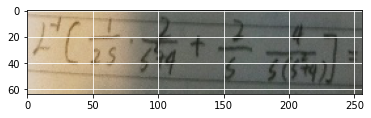

gt: \left. L ^ { - 1 } \left( \frac { 1 } { 2 s } \cdot \frac { 2 } { s ^ { 2 } + 4 } + \frac { 2 } { s } \frac { 4 } { s \left( s ^ { 2 } + 4 \right) } \right) \right]
pd: L L ^ { - 1 } \left( \frac { 1 } { 2 s } \cdot \frac { 2 } { s ^ { 2 } + 4 } + \frac { 2 } { s } \frac { 4 } { s \left( s ^ { 2 } + 4 \right) \right) \right) = 


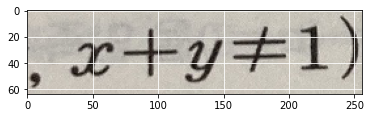

gt: \left. , x + y \neq 1 \right)
pd: , , x + y \neq 1 \right) 


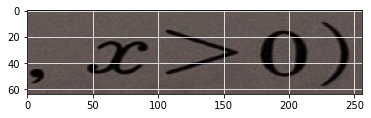

gt: \left. , x > 0 \right)
pd: , , x > 0 \right) 


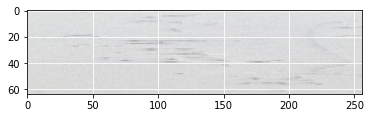

gt: \left. - 3 x \right) - \left( 2 4 x ^ { 3 } y ^ { 2 } - 3 x \right)
pd: = x x { - } x x x } } } } } { { } } { } } } } } } } } } } } } } } 


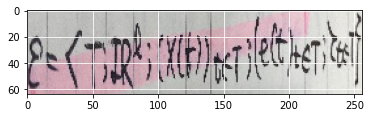

gt: \epsilon = < T ; I R ^ { l } ; \left. \left( X \left( 5 \right) \right) _ { t \in T } ; \left( e \left( t \right) _ { t \in T } ; \tau _ { t \in T } \right\} \right.
pd: \epsilon = < T < T ; R R ^ { l } ; \left( \left( \left( t \right) \right) _ { t \in \in } e \left( e \left( t t t ; ; ; ; ; T T T T T } T } 


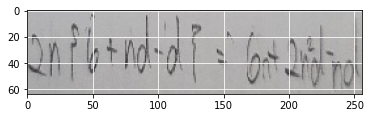

gt: 2 n \left\{ 6 + n d - d \right\} = 6 n + 2 n ^ { 2 } d - n d \right.
pd: 2 n \left\{ 6 + n d - d \right\} = 6 n + 2 n ^ { 2 } d n d 


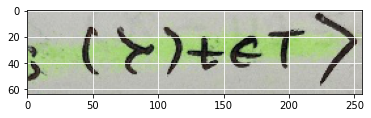

gt: \left. ; \left( \tau \right) t \in T \ r i g h t >
pd: ; \left( \tau \tau _ { t \in T T > 


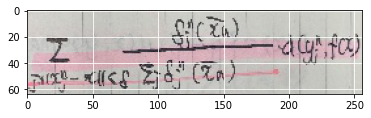

gt: \sum _ { J : \left\| x _ { j } ^ { n } - x \right\| < \delta } \frac { \delta _ { j } ^ { n } \left( \overline { x } _ { n } \right) } { \sum _ { j } \delta { j } ^ { n } \left( \overline { x } _ { n } \right) } \cdot d \left( y _ { j } ^ { n } , f \left( x \right) \right.
pd: \sum _ { j : \left\| x _ { j } - x \right\| < < < \delta } \delta { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { } } } } } } } } } } } } } } } } } } } } } } } } \right) \right) 


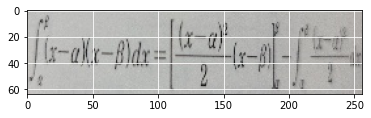

gt: \int _ { \alpha } ^ { \beta } \left( x - \alpha \right) \left( x - \beta \right) d x = \left[ \left. \frac { \left( x - \alpha \right) ^ { 2 } } { 2 } \left( x - \beta \right) \right] _ { \alpha } ^ { \beta } - \int _ { \alpha } ^ { \beta } \frac { \left( x - \alpha \right) ^ { 2 } } { 2 } d x \right.
pd: \int _ { \alpha } ^ { \beta } \left( x - \alpha \right) \left( x - \beta \right) d x = \left[ \frac { \left( x - \alpha \right) ^ { 2 } } { 2 } \left( x - \beta \right] _ { \alpha } ^ { \alpha } - \int _ { \alpha } ^ { \alpha } \frac { \alpha - \alpha ^ { 2 } } } d x d x 


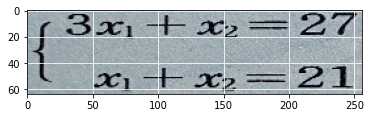

gt: \left\{ \begin{matrix} { c } 3 x _ { 1 } + x _ { 2 } = 2 7 \\ x _ { 1 } + x _ { 2 } = 2 1 \end{matrix} \right.
pd: \left\{ \begin{matrix} { 3 3 } 3 x x { 1 } + x _ 2 2 7 \\ x _ 1 1 x { { x { 2 2 2 2 1 1 \end{matrix} 


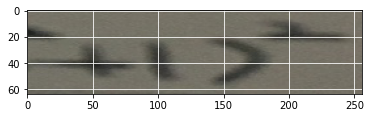

gt: \left. + 1 \right) ^ { 2 }
pd: + 1 \right) ^ { 2 } 


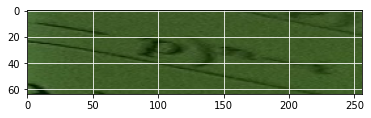

gt: \left. - p \right) ^ { n - i }
pd: - p \right) ^ { n - } 


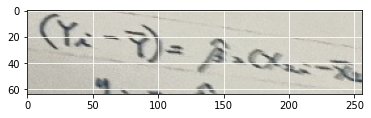

gt: \left( Y _ { i } - \overline { Y } \right) = \widehat { \beta } _ { 2 } \left( X _ { 2 i } - \overline { X } _ { 2 } \right.
pd: \left( Y _ { i } - \overline { Y } \right) = \widehat { \beta } _ { 2 } \alpha _ { 2 } - \overline { x } 


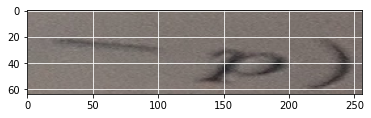

gt: \left. - p \right)
pd: - p \right) 


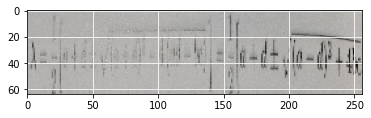

gt: \lambda = \frac { 1 } { 2 } \left[ a + d \pm \sqrt { \left( a + d \right) ^ { 2 } - 4 \left( a d - b c \right) } \right] = \frac { 1 } { 2 } \left[ a + d \pm \sqrt { \left( a - d \right) ^ { 2 } + 4 b c } \right.
pd: \lambda = \frac { 1 } { 2 } \left[ a + d \pm \sqrt { \left( a + d \right) ^ { 2 } - d \left( d - k \right) \right) \right) = { { { 1 } { { } } } } \pm \pm \sqrt \pm \sqrt a a a a ^ ^ { + 4 4 } } } } 


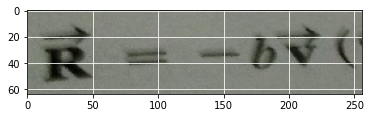

gt: \overrightarrow { R } = - b \overrightarrow { v } \left( \right.
pd: \overrightarrow R R } - b \overrightarrow { v v 


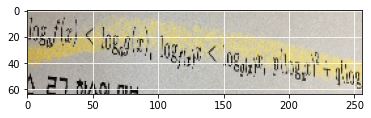

gt: \log _ { a } f \left( x \right) < \log _ { a } g \left( x \right) , \log _ { f \left( x \right) } x < \log _ { g \left( x \right) } x , p \left( \log _ { a } x \right) ^ { 2 } + q \left( \log \right.
pd: \log _ { a } f \left( x \right) < \log _ { a } g \left( x \right) , \log _ { f \left( a \right) } x < \log _ { a } x , , , \log _ { a } x , x ^ { { } q q q q q q q q 


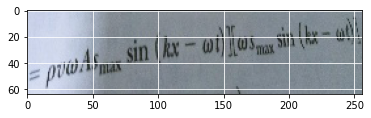

gt: \left. = \rho v \omega A s _ { \max } \sin \left( k x - \omega t \right) \right] \left[ \omega s _ { \max } \sin \left( k x - \omega t \right) \right]
pd: = \rho v v \omega A s _ \max \max } \sin \left( k x - \omega \right) \right] \right] _ s s \sin \sin \left( k x - \omega \right] \right] \right] \right] \right] 


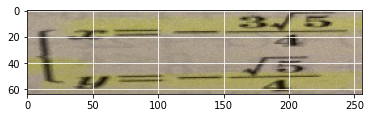

gt: \left\{ \begin{matrix} { l } x = - \frac { 3 \sqrt { 5 } } { 4 } \\ y = - \frac { \sqrt { 5 } } { 4 } \end{matrix} \right.
pd: \left\{ \begin{matrix} { l } x = - \frac { 3 \sqrt { 5 } } } \\ y = = - \frac { { { { { } } } } } \end{matrix} \end{matrix} 


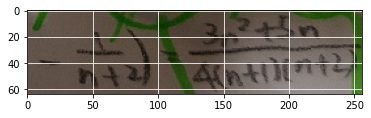

gt: \left. - \frac { 1 } { n + 2 } \right) = \frac { 3 n ^ { 2 } + 5 n } { 4 \left( n + 1 \right) \left( n + 2 \right) }
pd: - \frac { 1 } { n + 2 } = \frac { 3 n ^ { 2 } + 5 n } { 4 \left( n + 1 \right) \left( n + 2 \right) } 


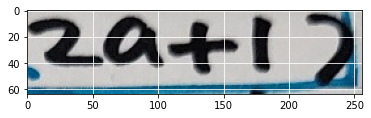

gt: \left. 2 a + 1 \right)
pd: 2 a + 1 2 


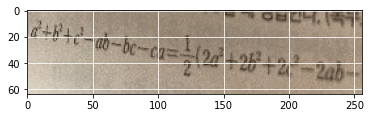

gt: a ^ { 2 } + b ^ { 2 } + c ^ { 2 } - a b - b c - c a = \frac { 1 } { 2 } \left( 2 a ^ { 2 } + 2 b ^ { 2 } + 2 c ^ { 2 } - 2 a b \right.
pd: a ^ { 2 } + b ^ { 3 } + c ^ { 3 } - a b - b c - c = \frac { 1 } { 2 } \left( 2 a ^ { 2 } + 2 b ^ { 2 } + 2 c ^ { 2 } - 2 a b - 


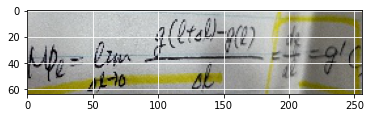

gt: M P _ { l } = \lim _ { \Delta t \to 0 } \frac { g \left( l + \Delta l \right) - g \left( l \right) } { \Delta t } = \frac { d q } { d l } = g ^ { \prime } \left( \right.
pd: M P _ { 2 } = \lim _ { \Delta t \to 0 } \frac { g \left( l + \Delta l \right) - g \left( l \right) } { d t } = \frac { d d } { d } } = g ^ { \prime } } 


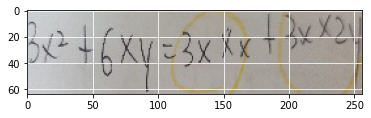

gt: 3 x ^ { 2 } + 6 \times y = \left( 3 x \times x \right) + \left( 3 x \times 2 y \right.
pd: 3 x ^ { 2 } + 6 \times y = 3 x x x + 3 x \times 2 y 


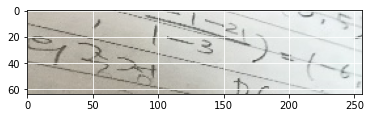

gt: \left. , \frac { - 1 - 2 1 } { 1 - 3 } \right) = \left( - 6 , \right.
pd: \left. \frac \frac { 1 - 1 - 2 1 } { 1 - 3 } \right) } { 1 3 2 , 6 , 


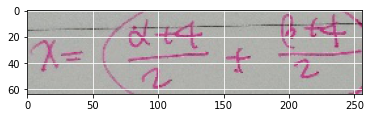

gt: x = \left( \frac { \alpha + 4 } { 2 } + \frac { \beta + 4 } { 2 } \right.
pd: x = \frac { \alpha + 4 } { 2 } + \frac { \beta + 4 } { 2 } 


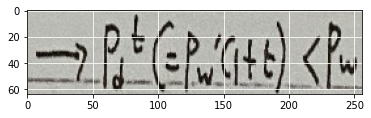

gt: \rightarrow { P _ { d } } ^ { t } \left( = { p _ { w } } ^ { \prime } \left( 1 + t \right) < p _ { w } \right.
pd: \rightarrow { P _ { d } ^ { t } \left( = _ { { w } ^ { \prime } \left( 1 + + \right) < < w w 


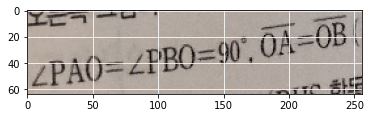

gt: \angle { P A O } = \angle { P B O } = 9 0 ^ { \circ } , \overline { O A } = \overline { O B } \left( \right.
pd: \angle { P A O } = \angle \angle O O 9 9 0 ^ { \circ { { { { O A O O } O B } } } 


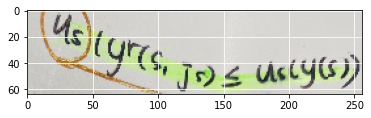

gt: u _ { s } \left( y ^ { r } \left( s , j s \right) \leq u _ { s } \left( y \left( s \right) \right) \right.
pd: u _ { s } \left( y ^ { r } \left( s , j _ { 0 } \right) \leq u _ { s } \left( y \left( s \right) \right) 


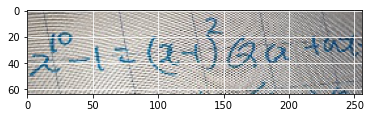

gt: x ^ { 1 0 } - 1 = \left( x - 1 \right) ^ { 2 } Q \left( x + a x \right.
pd: x ^ { 1 0 } - 1 = \left( x - 1 \right) ^ { 2 } Q x + a x 


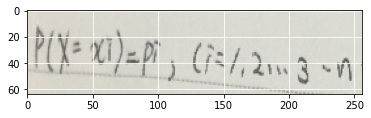

gt: P \left( X = x i \right) = p i , \left( i = 1 , 2 \cdots 3 - n \right.
pd: P \left( X = x i \right) = P _ { i } , C _ { i } = 1 , 2 \cdots 3 \cdots n 


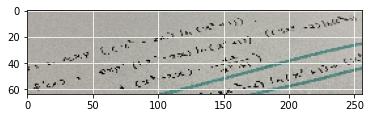

gt: f ^ { \prime } \left( x \right) = e x p ^ { \prime } \left( \left( x ^ { 3 } - 2 x \right) \ln \left( x ^ { 2 } + 1 \right) \right) \cdot \left( \left( 3 x ^ { 2 } - 2 \right) \ln \left( x ^ { 2 } + 1 \right) \right.
pd: f ^ { \prime } \left( x \right) = e ^ { x } ^ { { } \left( x x x x x x x x x x x x x x x x x 2 x 2 } \left( \left( x x x 2 x x x x \right) \right) \right) \right) \right) \right) \right) \right) \right) \right) \right) \right) \right) \right) \right) 


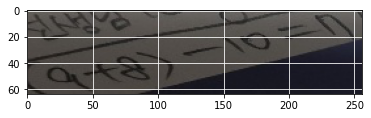

gt: \left. 9 + 8 \right) - 1 0 = 7
pd: \left( 9 + 8 \right) - 1 0 = 7 


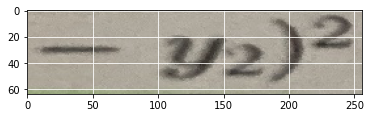

gt: \left. - y _ { 2 } \right) ^ { 2 }
pd: - - y _ { 2 } \right) ^ { 2 } 


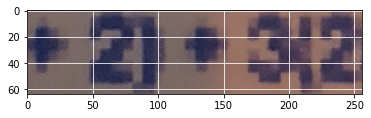

gt: \left. + 2 \right) + 3 \left( 2 \right.
pd: \left. + 2 \right) + 3 \left( 2 


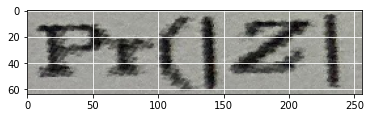

gt: P r \left( \left| Z \right| \right.
pd: P r \left( | Z | 


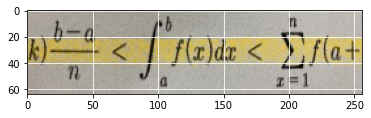

gt: \left. k \right) \frac { b - a } { n } < \int _ { a } ^ { b } f \left( x \right) d x < \sum _ { x = 1 } ^ { n } f \left( a + \right.
pd: \left. k \right) \frac { b - a } { n } < \int _ { a } ^ { b } f \left( x \right) d x < \sum _ { x = 1 } ^ { n } f \left( a + 


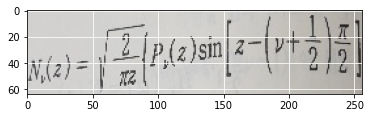

gt: N _ { \nu } \left( z \right) = \sqrt { \frac { 2 } { \pi z } } \left\{ P _ { \nu } \left( z \right) \sin \left[ z - \left( \nu + \frac { 1 } { 2 } \right) \frac { \pi } { 2 } \right] \right.
pd: N _ { \nu } \left( z \right) = \sqrt { \frac { 2 } { \pi z } } \left[ P _ { \nu } \left( z \right) \sin \left[ z - \left( \nu + \frac { 1 } { 2 } \right) \frac { \pi } { 2 } \right] 


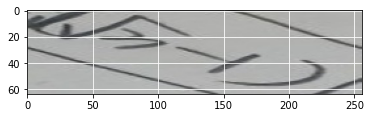

gt: \left. \sqrt { 3 } - 1 \right)
pd: \left( \sqrt { 3 } - 1 \right) 


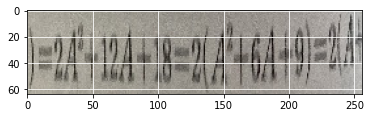

gt: = 2 A ^ { 2 } + 1 2 A + 1 8 = 2 \left( A ^ { 2 } + 6 A + 9 \right) = 2 \left( A + \right.
pd: = 2 A ^ { 2 } + 1 2 A + 1 8 = 2 \left( A ^ { 2 } + 6 A + 9 \right) = 2 \left( A + 


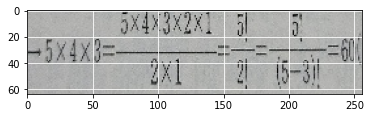

gt: \rightarrow 5 \times 4 \times 3 = \frac { 5 \times 4 \times 3 \times 2 \times 1 } { 2 \times 1 } = \frac { 5 ! } { 2 ! } = \frac { 5 ! } { \left( 5 - 3 \right) ! } = 6 0 \left( \right.
pd: - 5 \times 4 \times 3 = \frac { 5 \times 4 \times 3 \times 2 \times 1 } { 2 \times 1 } = \frac { 5 | } { 2 | } = \frac { 5 ! } { \left( 5 - 3 \right) ! } = 6 0 


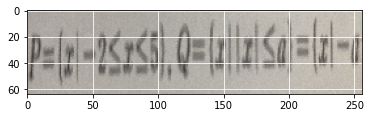

gt: P = \left\{ x | - 2 \leq x \leq 5 \right\} , Q = \left\{ x | \left| x \right| \leq a \right\} = \left\{ x | - a \right.
pd: P = \left\{ x | - 2 \leq x \leq 5 \right\} , Q = \left\{ x | | x | \leq a \right\} = \left\{ x a 


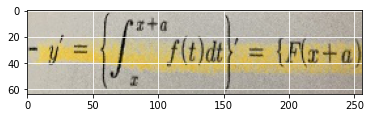

gt: - y ^ { \prime } = \left\{ \int _ { x } ^ { x + a } f \left( t \right) d t \right\} ^ { \prime } = \left\{ F \left( x + a \right) \right.
pd: - y ^ { \prime } = \left\{ \int _ { x } ^ { x + a } f \left( t \right) d t \right\} ^ { \prime } = \left\{ F \left( x + a \right) 


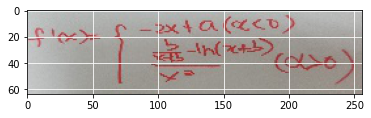

gt: f ^ { 1 } \left( x \right) = \left\{ \begin{matrix} - 2 x + a \left( x < 0 \right) \\ \frac { { \frac { b } { x + b } } - l h \left( x + 3 \right) } { x ^ { 2 } } \left( \alpha > 0 \right) \end{matrix} \right.
pd: f ^ { 1 } \left( x \right) = \left\{ \begin{matrix} - 2 x + a \left( x < 0 \right) \\ \frac { \frac { \frac { { b } } } } } } } x x x x x x } } } } } } } \left( > 0 \right) \right) \right) \end{matrix} 


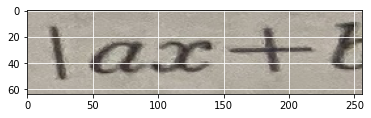

gt: \left| a x + b \right.
pd: \left| a x + b 


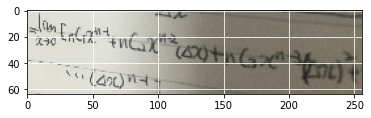

gt: = \lim _ { x \to 0 } \left[ n C _ { 1 } x ^ { n - 1 } + n C _ { 2 } x ^ { n - 2 } \left( \Delta x \right) + n C _ { 3 } x ^ { n - 3 } \left( \Delta x \right) ^ { 2 } + \right.
pd: = \lim _ { x \to 0 } \left[ { _ _ { n - 1 } } n { n n n n C n C _ { { n n n } } } } \Delta x \Delta x + n n 3 3 { { { - { - } } } } } } 2 ^ } } } } 


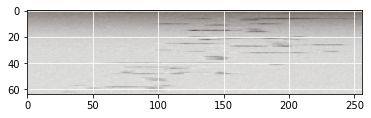

gt: \left. 5 x - 5 y \right) - \left( 4 x + 7 y \right)
pd: = - x x x x x x y - - - - - 


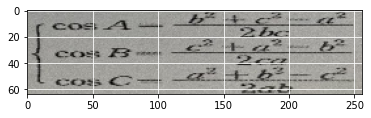

gt: \left\{ \begin{matrix} \cos A = \frac { b ^ 2 + c ^ 2 - a ^ 2 } { 2 b c } \\ \cos B = \frac { c ^ 2 + a ^ 2 - b ^ 2 } { 2 c a } \\ \cos C = \frac { a ^ 2 + b ^ 2 - c ^ 2 } { 2 a b } \end{matrix} \right.
pd: \left\{ \begin{matrix} { \cos } \cos A - \frac { b { { { { { { { { { { { { { { } } } { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } 


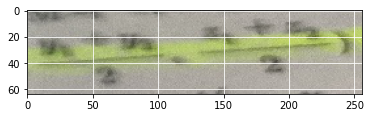

gt: \left. \frac { y _ { 1 } + y _ { 2 } } { 2 } , \frac { z _ { 1 } + z _ { 2 } } { 2 } \right)
pd: \frac { n + n } { 2 } , \frac { n + { _ { } } } } 2 \right) 


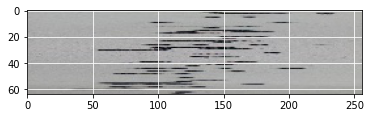

gt: \overline { a } = \left( \ddot { r } e _ { r } + \dot { r } \theta e _ { \theta } \right) + \left( \dot { r } \theta e _ { \theta } + r \ddot { \theta } e _ { \theta } + \right.
pd: \overline { \theta } = r \theta \theta \theta \theta r \theta r { { } } } } { { } } { } } \theta } \theta } \theta } \theta } \theta } \theta } \theta } \theta } \theta } \theta } \theta } \theta } } \theta } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } 


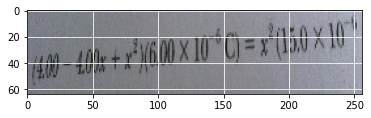

gt: \left( 4 . 0 0 - 4 . 0 0 x + x ^ { 2 } \right) \left( 6 . 0 0 \times 1 0 ^ { - 6 } { C } \right) = x ^ { 2 } \left( 1 5 . 0 \times 1 0 ^ { - 6 } \right.
pd: \left( 4 . 0 0 - 4 . 0 0 x + x ^ { 2 } \right) \left( 6 . 0 0 \times 1 0 ^ { - 6 } C \right) = x ^ { 2 } \left( 1 5 . 0 \times 1 0 ^ { 6 6 } 


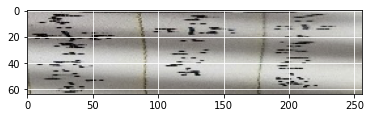

gt: \left\{ \begin{matrix} v _ { y } = \frac { d y } { d t } \rightarrow y = y _ { 0 } + v _ { 0 y } t - \frac { 1 } { 2 } g t ^ { 2 } \\ a _ { y } = \frac { d v _ { y } } { d t } \rightarrow v _ { y } = v _ { 0 y } - g t \\ a _ { y } d y = \frac { d v _ { y } } { d t } d y \rightarrow v _ { y } ^ { 2 } = v _ { 0 y } ^ { 2 } - 2 g y \end{matrix} \right.
pd: \left\{ \begin{matrix} \frac { y } { } } { { } { { { { { { { { { { { { _ { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } { { { { { { { { { { { { { { 


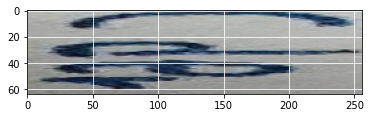

gt: \left( d e _ { r } \right.
pd: \left( a _ 


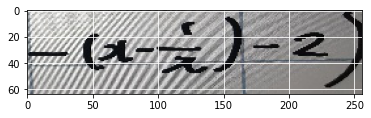

gt: \left. - \left( x - \frac { 1 } { x } \right) - 2 \right)
pd: - \left( x - \frac { 1 } { x } \right) - 2 \right) 


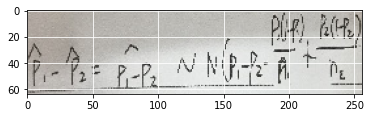

gt: \widehat { P } _ { 1 } - \widehat { P } _ { 2 } = \widehat { P _ { 1 } - P _ { 2 } } \sim N \left( P _ { 1 } - P _ { 2 } - \frac { P _ { 1 } \left( 1 - P _ { 1 } \right) } { n _ { 1 } } + \frac { P _ { 2 } \left( 1 - P _ { 2 } \right) } { n _ { 2 } } \right.
pd: \widehat { P } _ { 1 } - \widehat { P } _ { 2 } = \widehat { P } _ { 1 } - P _ { 2 } \sim N N \left( P _ { 1 } - { { } } { { { } { { { } } } } } } } } } } } } } } } } { { { { { { { { { { { { { } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } 


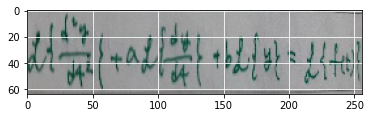

gt: { L } \left\{ \frac { d ^ { 2 } y } { d t ^ { 2 } } \left\{ + a { L } \left\{ \frac { d y } { d t } \right\} + b L \left\{ y \right\} = { L } \left\{ f \left( t \right) \right\} \right. \right.
pd: { L } \left\{ \frac { d ^ { 2 } y } { d t ^ { 2 } } \left\{ + a \left\{ \frac { d y } { d t } \right\} + b L \left\{ L \left\{ \left\{ \left\{ \left\{ \left\{ \right\} \right\} \right\} \right\} \right\} \right\} 


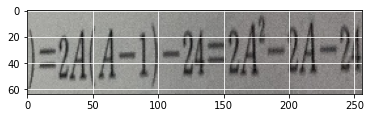

gt: \left. \right) = 2 A \left( A - 1 \right) - 2 4 = 2 A ^ { 2 } - 2 A - 2 4
pd: \right) = 2 A \left( A - 1 \right) - 2 = A A ^ { 2 2 2 A - 2 


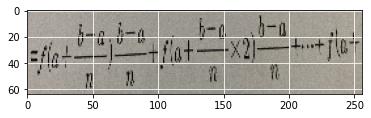

gt: = f \left( a + \frac { b - a } { n } \right) \frac { b - a } { n } + f \left( a + \frac { b - a } { n } \times 2 \right) \frac { b - a } { n } + \cdots + f \left( a + \right.
pd: = f \left( a + \frac { b - a } { n } \right) \frac { b - a } { n } + f \left( a + \frac { b - a } { n } \times 2 \right) \frac { b - a } { n } + f \left( a + f \left( a + 


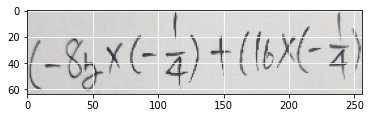

gt: \left( - 8 y \times \left( - \frac { 1 } { 4 } \right) + \left( 1 6 \times \left( - \frac { 1 } { 4 } \right) \right. \right.
pd: \left( - 8 y \times \left( - \frac { 1 } { 4 } \right) + \left( 1 6 \times \left( - \frac { 1 } { 4 } \right) 


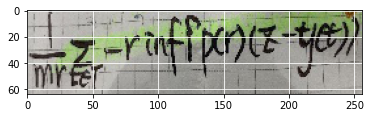

gt: \frac { 1 } { m r } \sum _ { t \in T } - r i n f \left\{ p \left( r \right) \left( z - y \left( t \right) \right) \right.
pd: \frac { 1 } { m r } \sum _ { t \in T } - r i n f \left\{ p \left( r \right) \left( z - y \left( t \right) \right) 


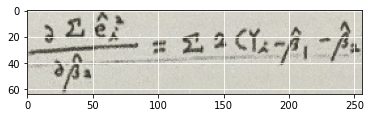

gt: \frac { \partial \sum \widehat { e } _ { i } ^ { 2 } } { \partial \widehat { \beta } _ { 2 } } = \sum 2 \left( Y _ { i } - \widehat { \beta } _ { 1 } - \widehat { \beta } _ { 2 } \right.
pd: \frac { \partial \sum \widehat { e } _ { i } ^ { 2 } } { \partial \widehat { \beta } _ { 2 } } = \sum 2 \left( Y _ { i } - \widehat { \beta } _ { 1 } - \widehat { \beta } } } } } 


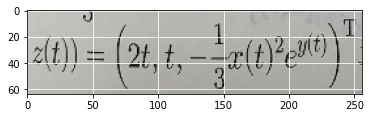

gt: \left. z \left( t \right) \right) = \left( 2 t , t , - \frac { 1 } { 3 } x \left( t \right) ^ { 2 } e ^ { y \left( t \right) } \right) ^ { { T } }
pd: z \left( t \right) \right) = \left( 2 t , t , - \frac { 1 } { 3 } x \left( t \right) ^ { 2 } e ^ { \prime \left( t \right) } \right) ^ { T } 


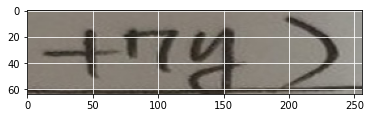

gt: \left. + 7 y \right)
pd: + + 7 y \right) 


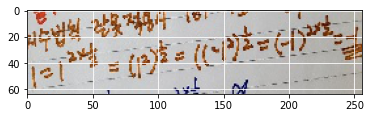

gt: 1 = 1 ^ { 2 \times \frac { 1 } { 2 } } = \left( 1 ^ { 2 } \right) ^ { \frac { 1 } { 2 } } = \left( \left( - 1 ^ { 2 } \right) ^ { \frac { 1 } { 2 } } = \left( - 1 \right) ^ { 2 \times \frac { 1 } { 2 } } = - 1 \right.
pd: 1 = 1 ^ { 2 \times \frac { 1 } { 2 } } = \left( 1 ^ { 2 } \right) ^ { \frac { 1 } { 2 } } = \left( \left( - 1 1 ^ { 2 } } \right) ^ { { { { { } } } } } } } \left( - 1 { { { { { { { { { { } } } } } } 


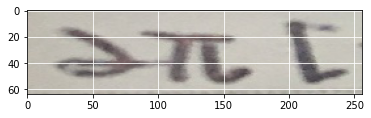

gt: 2 \pi \left[ \right.
pd: 2 \pi L 


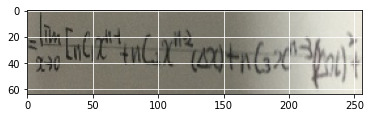

gt: = \lim _ { x \to 0 } \left[ { } _ { n } C _ { 1 } x ^ { n - 1 } + { } _ { n } C _ { 2 } x ^ { n - 2 } \left( \Delta x \right) + { } _ { n } C _ { 3 } x ^ { n - 3 } \left( \Delta x \right) ^ { 2 } + \right.
pd: = \lim _ { x \to 0 } \left[ _ { n } C _ { 1 } x ^ { n - 1 } + n C _ { 2 } x ^ { 2 } \left( \Delta x \right) + n \left( 3 x ^ { n - 3 - - } \left( - n - ^ 2 2 2 2 } 


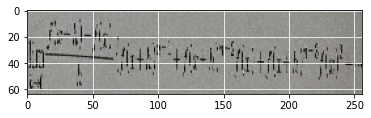

gt: \lim _ { h \to 0 } \frac { f \left( x + h \right) - f \left( x \right) } { h } \left\{ f \left( x + h \right) ^ { n - 1 } + f \left( x + h \right) ^ { n - 2 } f \left( x \right) + f \left( x + h \right) ^ { n - 3 } f \left( x \right) ^ { 2 } + \cdots \right.
pd: \lim _ { h \to 0 } \frac { f \left( x + h \right) - f \left( x \right) } { h } \left\{ \left( x + h \right) ^ { n - 1 } + f \left( x + h \right) ^ { n - } f \left( + + + + + + + \right) ^ { { - } } f } } } } + 


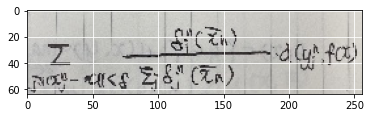

gt: \sum _ { j : \left\| x _ { j } ^ { n } - x \right\| < \delta } \frac { \delta _ { j } ^ { n } \left( \overline { x } _ { n } \right) } { \sum _ { j } \delta _ { j } ^ { n } \left( \overline { x } _ { n } \right) } d \left( y _ { j } ^ { n } , f \left( x \right) \right.
pd: \sum _ { j : \left\| x _ { j } } - x n < < < \frac { \delta \delta { { } } { } { } { } { { { { { { { { { { { { { { { { \delta { { { { { { { { } } } } } } } } } } } } } } } } } } } } } } } } \right) \right) \right) \right) \right) \right) \right) \right) \right) \right) \right) \right) \right) \right) 


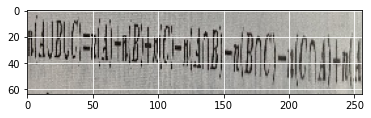

gt: n \left( A \cup B \cup C \right) = n \left( A \right) + n \left( B \right) + n \left( C \right) - n \left( A \cap B \right) - n \left( B \cap C \right) - n \left( C \cap A \right) + n \left( A \right.
pd: n \left( A \cup A C = = \left( A + \left( A + B B n C C C C C C \right) A n \right) B C B C C C C C C C C C A A A A A 


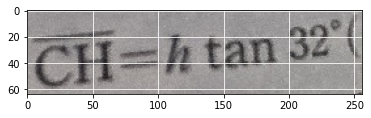

gt: \overline { { C H } } = h \tan 3 2 ^ { \circ } \left( \right.
pd: \overline { { H } } } h \tan \tan 3 ^ 2 \circ } \left( \left( 


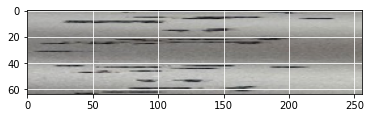

gt: \left( \dot y _ { B } = v _ { B } , \dot y _ { A } = v _ { A } \right.
pd: U _ { { } = { { { { { { { { } } } } } } } } } } } } 


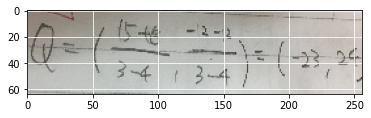

gt: Q = \left( \frac { 1 5 + 8 } { 3 - 4 } , \frac { - 1 2 - 1 2 } { 3 - 4 } \right) = \left( - 2 3 , 2 4 \right.
pd: Q = \left( \frac { 1 5 + 8 } { 3 - 4 } , \frac { - 2 - 2 } { 3 - 4 } \right) = \left( - 2 3 , 2 4 


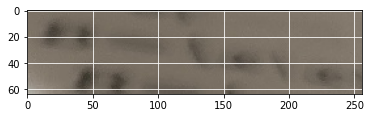

gt: B = \left\{ x | x \right.
pd: h = \left| x \right| 


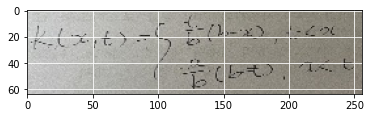

gt: k \left( x , t \right) = \left\{ \begin{matrix} \frac { t } { b } \left( b - x \right) , & t < x \\ \frac { x } { b } \left( b - t \right) , & x < t \end{matrix} \right.
pd: k \left( x , t \right) = \left\{ \begin{matrix} \frac { t } { b } \left( b - x \right) , t < x \\ \frac { b } { b } \left( b - t \right) , x t \end{matrix} \right. t \end{matrix} 


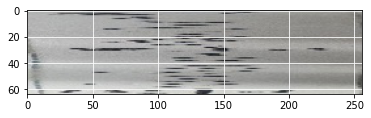

gt: F _ { \theta f } = 2 \times \left( 1 \times 2 0 0 ^ { \circ } / s \times \frac { \pi } { 1 8 0 ^ { \circ } } + 2 x - 0 . 5 m / s \times - 5 0 ^ { \circ } / s \times \frac { \pi } { 1 8 0 ^ { \circ } } \right.
pd: F _ { \theta } = 2 . 2 \times 2 \times 2 \times 2 \times 2 \times 2 \times 2 \times 2 2 2 { { { } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } 


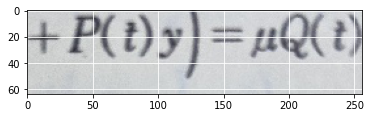

gt: \left. + P \left( t \right) y \right) = \mu Q \left( t \right)
pd: + P \left( t \right) y \right) = \mu Q \left( t \right) 


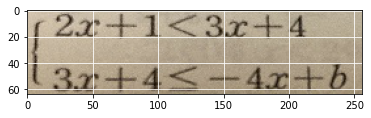

gt: \left\{ \begin{matrix} { l } 2 x + 1 < 3 x + 4 \\ 3 x + 4 \leq - 4 x + b \end{matrix} \right.
pd: \left\{ \begin{matrix} { l } 2 x + 1 < 3 x + 4 \\ 3 3 x 4 \leq - 4 x + + b \end{matrix} 


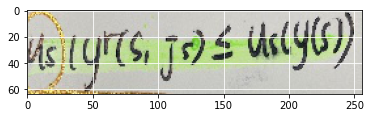

gt: u _ { s } \left( y ^ { r } \left( s _ { 1 } j s \right) \leq u _ { s } \left( y \left( s \right) \right) \right.
pd: u _ { s } \left( y ^ { r } \left( s _ { 1 } j _ { s } \right) \leq u _ { s } \left( y \left( s \right) \right) 


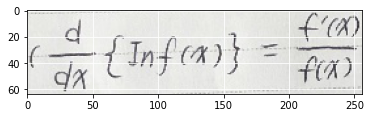

gt: \left( \frac { d } { d x } \left\{ { I n } f \left( x \right) \right\} = \frac { f ^ { \prime } \left( x \right) } { f \left( x \right) } \right.
pd: \left( \frac { d } { d x } \left\{ { I _ { n } f \left( x \right) \right\} = \frac { f ^ { \prime } \left( x \right) } f \left( x \right) 


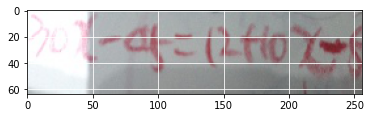

gt: 3 0 x - 4 5 = \left( 2 + 1 0 x - 5 \right.
pd: 3 0 x - 4 5 = 1 2 + 1 0 x - 6 


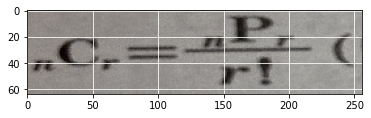

gt: { } _ { n } { C } _ { r } = \frac { { } _ { n } { P } _ { r } } { r ! } \left( \right.
pd: { } _ { n } { C } _ { r } = \frac { { { { { { { { { } } } r } r } r } \left( 


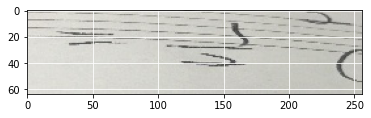

gt: = \frac { 1 } { 2 } \left( \right.
pd: = \frac { { } } } } } } 


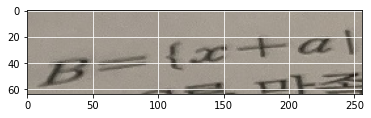

gt: B = \left\{ x + a | \right.
pd: B = \left\{ x + a | \\ a | 


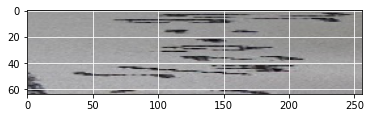

gt: v _ { B } = - 0 . 2 m / s \left( \right.
pd: - _ { { } = - m { { } } } 


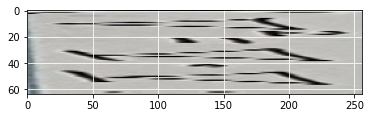

gt: \left( \nabla ^ { 2 } = I \cdot \nabla : \right.
pd: q ^ { 2 } \nabla \nabla \nabla \nabla 


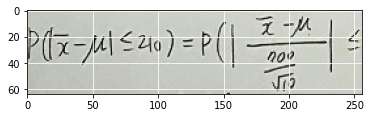

gt: P \left( \left| \overline { x } - \mu \right| \leq 2 1 0 \right) = P \left( \left| \frac { \overline { x } - \mu } { \frac { 7 0 0 } { \sqrt { 1 0 } } } \right| \leq \right.
pd: P \left( \left| \overline { x } - \mu \right| \leq 2 1 0 \right) = P \left( \left| \frac { \overline { x } - \mu } { \frac { 7 0 0 } } { \sqrt { 1 0 } } \right| \leq 


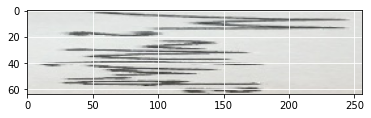

gt: M _ { 2 } \sim N \left( \mu , d ^ { 2 } \right.
pd: M _ { { } \sim N _ { } } N 


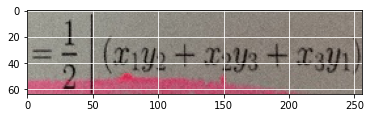

gt: = \frac { 1 } { 2 } \left| \left( x _ { 1 } y _ { 2 } + x _ { 2 } y _ { 3 } + x _ { 3 } y _ { 1 } \right) \right.
pd: = \frac { 1 } { 2 } \left| \left( x _ { 1 } y _ { 2 } + x _ { 2 } y _ { 3 } + x _ { 3 } y _ { 1 } \right) 


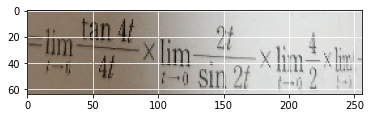

gt: = \lim _ { t \to 0 } \frac { \tan 4 t } { 4 t } \times \lim _ { t \to 0 } \frac { 2 t } { \sin 2 t } \times \lim _ { t \to 0 } \frac { 4 } { 2 } \times \lim _ { t \to 1 } \left( - \right.
pd: = \lim _ { t \to 0 } \frac { \tan 4 t } { 4 t } \times \lim _ { t \to 0 } \frac { 2 t } { \sin 2 t } \times \lim _ { t \to 0 } \frac { 4 } { 2 } \times \lim _ { t \to 1 } - 


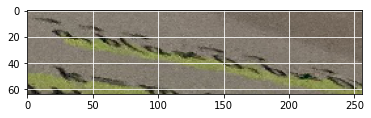

gt: = \overrightarrow { a } , \overrightarrow { b } \left( \overrightarrow { a } \neq \overrightarrow { 0 } , \overrightarrow { b } \neq \overrightarrow { 0 } \right.
pd: \overrightarrow { a } , \overrightarrow { b } \left( \overrightarrow { a } \neq \overrightarrow { a } , \overrightarrow \overrightarrow \overrightarrow \neq \overrightarrow \overrightarrow } } 


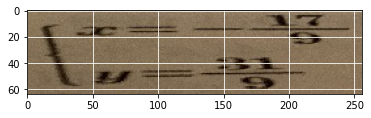

gt: \left\{ \begin{matrix} x = - \frac { 1 7 } { 9 } \\ y = \frac { 3 1 } { 9 } \end{matrix} \right.
pd: \left\{ \begin{matrix} x = - \frac { - 1 7 } { 9 } \\ y = \frac { 3 1 } { 9 } \end{matrix} \end{matrix} 


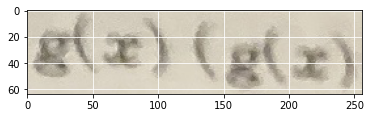

gt: g \left( x \right) \left( g \left( x \right) \right.
pd: g \left( x \right) \left( g \left( x \right) 


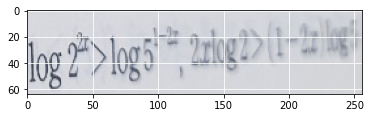

gt: \log 2 ^ { 2 x } > \log 5 ^ { 1 - 2 x } , 2 x \log 2 > \left( 1 - 2 x \right) \log { 5 } \right.
pd: \log 2 ^ { 2 x } > \log 5 ^ { 1 - 2 x } , 2 x \log \left( 1 - 2 x \right) \log 5 


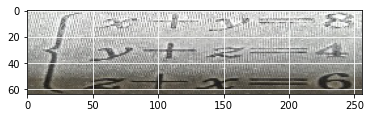

gt: \left\{ \begin{matrix} x + y = 8 \\ y + z = 4 \\ z + x = 6 \end{matrix} \right.
pd: \left\{ \begin{matrix} x + y = = = \\ y + + + 4 4 = = 6 \end{matrix} = 6 


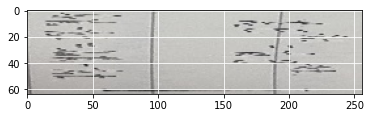

gt: \left. \begin{matrix} k _ { 2 } e ^ { - k t } = k _ { 1 } e ^ { - k _ { 1 } t } \\ \ln k _ { 2 } - k _ { 2 } t = \ln k _ { 1 } - k _ { 1 } t \end{matrix} \right]
pd: = \int _ { { } } { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { { } { } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } 


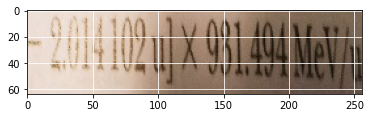

gt: \left. - 2 . 0 1 4 1 0 2 u \right] \times 9 3 1 . 4 9 4 M e V / u
pd: - 2 . 0 1 4 1 0 2 u 1 \times 9 3 1 . 4 9 4 M e V / 


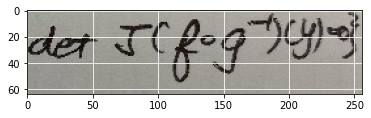

gt: \left. d e t J \left( f \circ g ^ { - 1 } \right) \left( y \right) = 0 \right\}
pd: d d t J \left( f \circ g ^ { - 1 } \right) \left( y \right) = 0 \right\} 


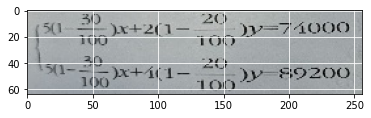

gt: \left\{ \begin{matrix} 5 \left( 1 - \frac { 3 0 } { 1 0 0 } \right) x + 2 \left( 1 - \frac { 2 0 } { 1 0 0 } \right) y = 7 4 0 0 0 \\ 5 \left( 1 - \frac { 3 0 } { 1 0 0 } \right) x + 4 \left( 1 - \frac { 2 0 } { 1 0 0 } \right) y = 8 9 2 0 0 \end{matrix} \right.
pd: \left\{ \begin{matrix} 5 \left( 1 - \frac { 3 0 } { 1 0 } \right) x + 2 \left( 1 - \frac { 2 0 } { 0 0 0 0 \right) \right) 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 


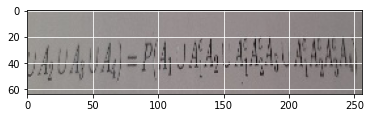

gt: \left. \cup A _ { 2 } \cup A _ { 3 } \cup A _ { 4 } \right) = P \left( A _ { 1 } \cup A _ { 1 } ^ { c } A _ { 2 } \cup A _ { 1 } ^ { c } A _ { 2 } ^ { c } A _ { 3 } \cup A _ { 1 } ^ { c } A _ { 2 } ^ { c } A _ { 3 } ^ { c } A _ { 4 } \right)
pd: \cup A _ { 2 } \cup A _ { 1 0 } \cup A _ { 4 } } = \left( A _ { 1 } } A A A A 2 } A _ } } A _ _ A A _ A A A A A A A A A A A A A A A A A A A A A A A A A \right) \right) \right) \right) \right) \right) 


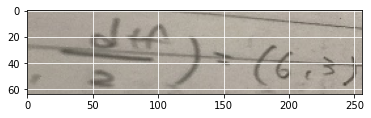

gt: \left. , \frac { d + f } { 2 } \right) = \left( 6 , 3 \right)
pd: , , \frac { d + f } { 2 } \right) = \left( 6 , 3 \right) 


In [173]:
p_i = 0
for name, pred, gt in results:
    if pred.strip() != gt.strip() and \
    (gt.split()[0] == '\\left.' and pred.split()[0] != '\\left.' or \
     gt.split()[-1] == '\\right.' and pred.split()[-1] != '\\right.'):
        p_i += 1
        origin_img('/opt/ml/input/data/train_dataset/256_64/'+name)
        print(f'gt: {gt}')
        print(f'pd: {pred}')
    if p_i == 100:
        break

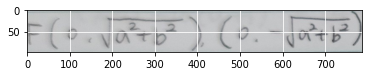

pd: F \left( 0 , \sqrt { a ^ { 2 } + b ^ { 2 } } \right) \left( 0 , - \sqrt { a ^ { 2 } + b ^ { 2 } \right) 
gt: F \left( 0 , \sqrt { a ^ { 2 } + b ^ { 2 } } \right) , \left( 0 , - \sqrt { a ^ { 2 } + b ^ { 2 } } \right)


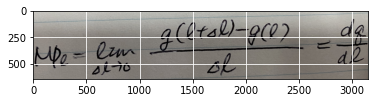

pd: M P _ { 2 } = \lim _ { \Delta l \to 0 } \frac { g \left( l l \Delta l g g g \left( \right) \right) } l l } = \frac { { d d d } } } } 
gt: M P _ { e } = \lim _ { \Delta l \to 0 } \frac { g \left( l + \Delta l \right) - g \left( l \right) } { \Delta l } = \frac { d g } { d l }


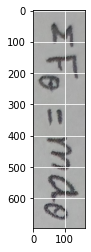

pd: F _ { y } = m _ { { } 
gt: \sum F _ { \theta } = m a _ { \theta }


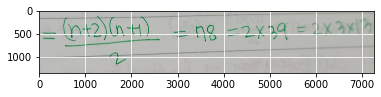

pd: = \frac { \left( n + 2 \right) \left( n + 1 \right) } { 2 } = 7 8 = 2 \times 9 9 = 2 \times 3 3 
gt: = \frac { \left( n + 2 \right) \left( n + 1 \right) } { 2 } = 7 8 = 2 \times 3 9 = 2 \times 3 \times 1 3


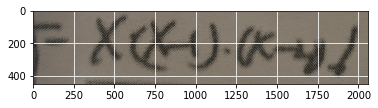

pd: = x \left( x - 1 \right) \cdot \left( x - y \right) 
gt: = x \left( x - 1 \right) \cdot \left( x - 2 \right) !


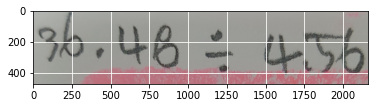

pd: 3 6 . 4 8 \div 4 . 5 6 
gt: 3 6 . 4 8 \div 4 , 5 6


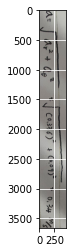

pd: a _ { a } = \sqrt { { { { } } } { { { { } } } } } { { { { { { { { { { { . . . . . . . . 2 . 2 2 2 2 2 ^ 
gt: a = \sqrt { a _ { r } ^ { 2 } + a _ { \theta } ^ { 2 } } = \sqrt { \left( 0 . 3 3 6 \right) ^ { 2 } + \left( 0 . 0 7 \right) ^ { 2 } } = 0 . 3 4 m / s


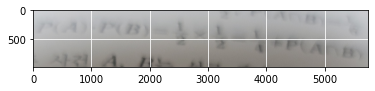

pd: P \left( A \cap B \right) - \frac { 1 } { 2 } = \frac { 1 } { 2 } = \frac { 1 } { 4 + A A a ^ { m } 
gt: P \left( A \right) \cdot P \left( B \right) = \frac { 1 } { 2 } \times \frac { 1 } { 2 } = \frac { 1 } { 4 } \neq \left( A \cap B \right)


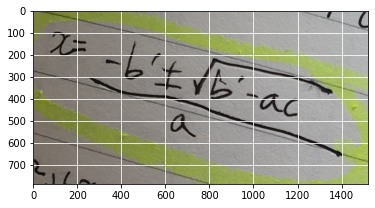

pd: x = \frac { - b ^ { \prime } \pm \sqrt { ^ { \prime } c } } } a } 
gt: x = \frac { - b ^ \prime \pm \sqrt { b ^ \prime - a c } } { a }


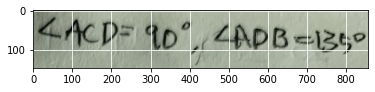

pd: \angle A C D = 9 0 ^ { \circ } , \angle A D B = 1 5 5 ^ { \circ } 
gt: \angle A C D = 9 0 ^ { \circ } , \angle A D B = 1 3 5 ^ { \circ }


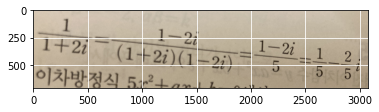

pd: \frac { 1 } { 1 + 2 i } = \frac { 1 - 2 i } { \left( 1 + i \right) \left( 1 - 2 i \right) \right) = \frac { 1 - 2 i } { } } { { { { { { { { { } } { } } } } } } } } 
gt: \frac { 1 } { 1 + 2 i } = \frac { 1 - 2 i } { \left( 1 + 2 i \right) \left( 1 - 2 i \right) } = \frac { 1 - 2 i } { 5 } = \frac { 1 } { 5 } - \frac { 2 } { 5 } i


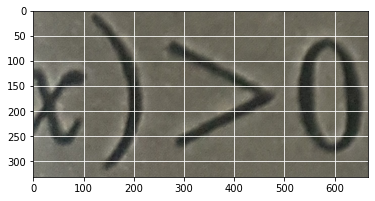

pd: \left. x \right) > 0 
gt: x \left. \right) > 0


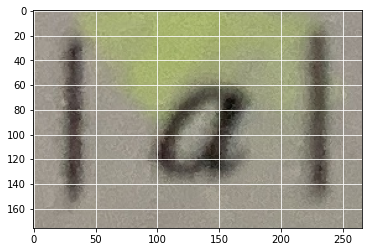

pd: \left| a \right| 
gt: | a |


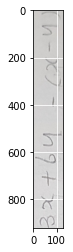

pd: = x x x x + + + 1 1 1 
gt: 3 x + 6 y - \left( x - y \right)


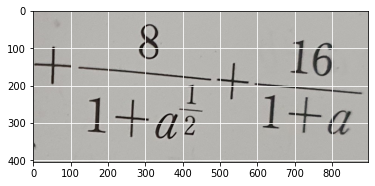

pd: + \frac { 8 } { 1 + a ^ { \frac { 1 } { 2 } } + \frac { 1 6 } { 1 + a } 
gt: + \frac { 8 } { 1 + a ^ { \frac { 1 } { 2 } } } + \frac { 1 6 } { 1 + a }


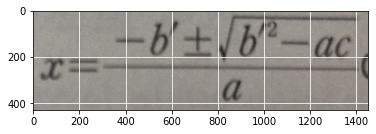

pd: x = \frac { - b ^ { \prime } \pm \sqrt { b ^ { 2 2 } - a c } } { a } 
gt: x = \frac { - b ^ { \prime } \pm \sqrt { b ^ { \prime 2 } - a c } } { a }


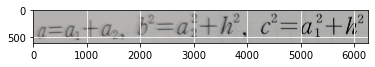

pd: a = a _ { 1 } + a _ { 2 } , b ^ { 2 } = a _ { 2 } ^ { 2 } + h ^ { 2 } , c ^ { 2 } = a _ { 1 } + h ^ { 2 } 
gt: a = a _ { 1 } + a _ { 2 } , b ^ { 2 } = a _ { 2 } ^ { 2 } + h ^ { 2 } , c ^ { 2 } = a _ { 1 } ^ { 2 } + h ^ { 2 }


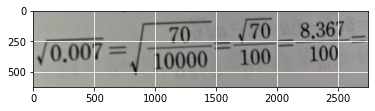

pd: \sqrt { 0 . 0 0 7 } = \sqrt { \frac { 7 0 } { 1 0 0 0 } } = \frac { \sqrt { 7 0 } } { 1 0 0 } = \frac 8 3 3 3 } } 0 0 0 0 0 0 
gt: \sqrt { 0 . 0 0 7 } = \sqrt { \frac { 7 0 } { 1 0 0 0 0 } } = \frac { \sqrt { 7 0 } } { 1 0 0 } = \frac { 8 . 3 6 7 } { 1 0 0 } =


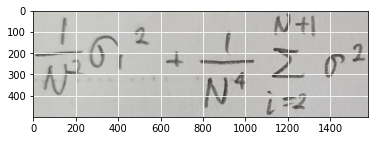

pd: \frac { 1 } { N ^ { 2 } } \sigma _ { 1 } ^ { 2 } + \frac { 1 } { N ^ { 4 } } \sum _ { i = 2 } ^ { { } \sigma ^ { 2 } 
gt: \frac { 1 } { N ^ { 2 } } \sigma ^ { 2 } _ { 1 } + \frac { 1 } { N ^ { 4 } } \sum _ { i = 2 } ^ { N + 1 } \sigma ^ { 2 }


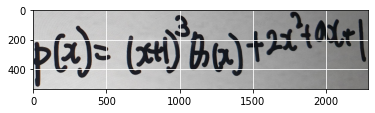

pd: p \left( x \right) = \left( x + 1 \right) ^ { 3 } B \left( x \right) + 2 x ^ { 2 } + a x + \right| 
gt: p \left( x \right) = \left( x + 1 \right) ^ { 3 } Q \left( x \right) + 2 x ^ { 2 } + a x + 1


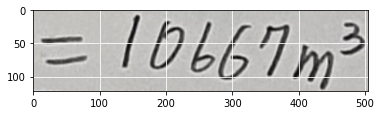

pd: = 1 0 6 6 7 m ^ { 3 } 
gt: = 1 0 6 6 7 { m } ^ { 3 }


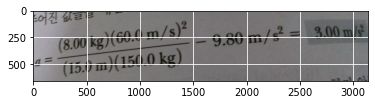

pd: a = \frac { \left( 5 . 0 0 0 m g \right) / / s \right) ^ { { 2 } } } } \left( \left( 1 . 0 0 0 0 0 0 0 0 0 0 0 0 0 m s s s ^ { } } } = 3 0 0 0 m m m ^ 2 } 
gt: a = \frac { \left( 8 . 0 0 k g \right) \left( 6 0 . 0 m / s \right) ^ { 2 } } { \left( 1 5 . 0 m \right) \left( 1 5 0 . 0 k g \right) } - 9 . 8 0 m / s ^ { 2 } = 3 . 0 0 m / s ^ { 2 }


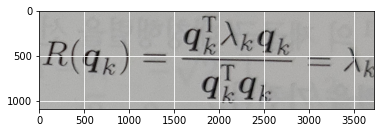

pd: R \left( q _ { k } \right) = \frac { q _ { k } ^ { T } \lambda _ { k } } q _ { k } q q { { q q q q q q } q } \lambda \lambda \lambda \lambda k 
gt: R \left( q _ { k } \right) = \frac { q _ { k } ^ { T } \lambda _ { k } q _ { k } } { q _ { k } ^ { T } q _ { k } } = \lambda _ { k }


In [48]:
for name, pred, gt in results:
    if pred.strip() != gt.strip():
        origin_img('/opt/ml/input/data/train_dataset/images/'+name)
        print(f'gt: {gt}')
        print(f'pd: {pred}')

# 하나씩 출력

In [29]:
from PIL import Image, ImageOps
from torchvision import transforms

In [31]:
cfg = dict()
cfg['rgb'] = 1

In [35]:
# for i in range (len(df)):
for i in [0]:
    # 1. 이미지
    img_name = df.iloc[i]['name']
    image = Image.open(f'/opt/ml/input/data/train_dataset/images/{img_name}')
    # rgb
    if cfg['rgb'] == 3:
        image = image.convert("RGB")
    elif cfg['rgb'] == 1:
        image = image.convert("L")
    # crop
    bounding_box = ImageOps.invert(image).getbbox()
    image = image.crop(bounding_box)
    # transform
    image =  transforms.Compose([transforms.Resize((128, 128)),
                                 transforms.ToTensor()])(image)
    print(image)
    # 2. gt
    gt_latex = df.iloc[i]['latex_str']
    print(gt_latex)
    # 3. pred
    

<PIL.Image.Image image mode=L size=903x213 at 0x7F11ED9E47D0>
tensor([[[0.7333, 0.7333, 0.7451,  ..., 0.7412, 0.7333, 0.7255],
         [0.7412, 0.7373, 0.7373,  ..., 0.7412, 0.7412, 0.7216],
         [0.7373, 0.7333, 0.7412,  ..., 0.7373, 0.7412, 0.7176],
         ...,
         [0.7176, 0.7216, 0.7255,  ..., 0.6863, 0.6863, 0.6902],
         [0.7176, 0.7176, 0.7255,  ..., 0.6902, 0.6902, 0.6941],
         [0.7216, 0.7294, 0.7255,  ..., 0.7020, 0.6980, 0.6941]]])
4 \times 7 = 2 8


In [42]:
# for labeling
%matplotlib inline
import glob
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from PIL import Image
import matplotlib.image as mpimg

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def create_data_frame(default_image_path:str,data_path:str,level_path:str,source_path:str):
    data = {}
    data['latex'] = []
    data['latex_str']=[] # 추가 1
    data['seq_len'] = []
    data['aspect_ratio'] = []
    data['image_width'] = []
    data['image_height'] = []
    data['level']=[]
    data['source']=[]
    data['img_name']=[] # 추가 2
    all_latex_list = []
    lv1_latex_list=[]
    lv2_latex_list=[]
    lv3_latex_list=[]
    lv4_latex_list=[]
    lv5_latex_list=[]
    invisible_list=[]
    with open(level_path) as f:
        level_info={}
        for line in f:
            path,level=line.replace("\n","").split("\t")
            level_info[path]=int(level)
            data['img_name'].append(path) # 추가 3
            
    with open(source_path) as f:
        source_info={}
        for line in f:
            path,source=line.replace("\n","").split("\t")
            source_info[path]=str(source)
            
    with open(data_path) as f:
        for idx,line in enumerate(f):
            image_path,latex=line.replace("\n","").split("\t")
            image = Image.open(default_image_path+image_path)
            width, height = image.size
            data['aspect_ratio'].append(round(width / height,1))
            data['image_width'].append(int(width))
            data['image_height'].append(int(height))
            data['latex_str'].append(latex) # 추가 4
            latex=latex.split(" ")
            if "\left." in latex or "\right." in latex:
                invisible_list.append(idx)
            data['latex'].append(latex)
            data['seq_len'].append(len(latex))
            level=level_info[image_path]
            data['level'].append(level)
            source=source_info[image_path]
            data['source'].append(source)
            all_latex_list += latex
            if level==1:
                lv1_latex_list += latex
            elif level==2:
                lv2_latex_list += latex
            elif level==3:
                lv3_latex_list += latex
            elif level==4:
                lv4_latex_list += latex
            else:
                lv5_latex_list += latex
    df = pd.DataFrame.from_dict(data)
    lv_latex_list=[lv1_latex_list,lv2_latex_list,lv3_latex_list,lv4_latex_list,lv5_latex_list]
    return df, all_latex_list, lv_latex_list, invisible_list

In [43]:
default_image_path="/opt/ml/input/data/train_dataset/images/"

def latex_to_img(img_num:int):
    a = df.iloc[img_num]['latex_str']
    ax = plt.axes([0,0,0.2,0.2]) #left,bottom,width,height
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')
    plt.text(0.3,0.5,'$%s$' %a, size=35,color="green")
    plt.show()

def origin_img(img_num:int):
    img_name = df.iloc[img_num]['img_name']
    img = mpimg.imread(default_image_path+img_name)
    plt.grid(True, color='w')
    plt.imshow(img)
    plt.show()

def compare_img_gt(img_num:int, visible_infos=False):
    # original img
    origin_img(img_num)
    
#     box1 = {'boxstyle': 'round',
#         'ec': (0.5, 0.3, 0.3), # edgecolor
#         'fc': (0.5, 0.8, 0.8)} # facecolor
    # 변경 ============================================================
    level_color=[
        'turquoise',
        'lightgreen',
        'gold',
        'sandybrown',
        'salmon'
    ]

    box1 = {'boxstyle': 'round',
        'ec': (0.1, 0.1, 0.1), # edgecolor
        'fc': level_color[int(df.iloc[img_num]['level'])]} # (0.5, 0.8, 0.8)} # facecolor
    # ===================================================================
    # ground truth latex to img
    latex_to_img(img_num)
    
    if visible_infos:
        display(df.iloc[img_num][1:])

In [44]:
df, all_latex_list, lv_latex_list, invisible_list = create_data_frame(
    default_image_path="/opt/ml/input/data/train_dataset/images/",
    data_path="/opt/ml/input/data/train_dataset/gt.txt",
    level_path="/opt/ml/input/data/train_dataset/level.txt",
    source_path="/opt/ml/input/data/train_dataset/source.txt"
)

In [45]:
df.head()

latex  \
0                            [4, \times, 7, =, 2, 8]   
1                              [a, ^, {, x, }, >, q]   
2                                     [8, \times, 9]   
3  [\sum, _, {, k, =, 1, }, ^, {, n, -, 1, }, b, ...   
4                              [I, =, d, q, /, d, t]   

                                           latex_str  seq_len  aspect_ratio  \
0                                   4 \times 7 = 2 8        6           4.2   
1                                      a ^ { x } > q        7           3.7   
2                                         8 \times 9        3           2.0   
3  \sum _ { k = 1 } ^ { n - 1 } b _ { k } = a _ {...       30           3.2   
4                                      I = d q / d t        7           3.4   

   image_width  image_height  level source         img_name  
0          903           213      1      1  train_00000.jpg  
1          435           118      2      0  train_00001.jpg  
2          348           172      2      0  train_00002.jpg  
3          964           299      3      1  train_00003.jpg  
4          700           208      4      0  train_00004.jpg

In [50]:
len(df)

100000

In [61]:
invisible_list[:5]

[42, 280, 392, 400, 425]

In [66]:
df.loc[0].img_name

'train_00000.jpg'

In [64]:
default_image_path + df.loc[0].img_name

'/opt/ml/input/data/train_dataset/images/train_00000.jpg'

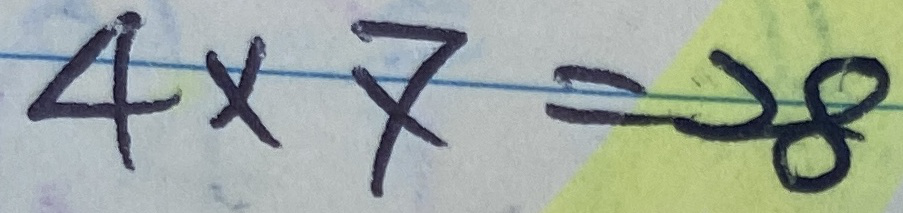

In [67]:
image = Image.open(default_image_path + df.loc[0].img_name)
image

In [ ]:
import pdb
pdb.set_trace()
model.eval()
results = []
for i in tqdm(100000):
    input = i.d["image"].to(device)
    expected = d["truth"]["encoded"].to(device)

    output = model(input, expected, False, 0.0)
    decoded_values = output.transpose(1, 2)
    _, sequence = torch.topk(decoded_values, 1, dim=1)
    sequence = sequence.squeeze(1)
    sequence_str = id_to_string(sequence, test_data_loader, do_eval=1)
    for path, predicted in zip(d["file_path"], sequence_str):
        results.append((path, predicted))

In [41]:
from dataset import dataset_loader, START, PAD,load_vocab

In [42]:
################################# paresr 부분 대체하는 코드 ########################
# 이후 parser에 접근 하는 코드 모두 알맞게 수정
cfg = dict()
cfg['checkpoint'] = '/opt/ml/code/log/satrn_50/checkpoints/0050.pth'
cfg['max_sequence'] = 230
cfg['batch_size'] = 2
cfg['file_path'] = '/opt/ml/input/data/train_dataset/gt.txt'
####################################################################################

# 1. 체크포인트 로드
is_cuda = torch.cuda.is_available()
checkpoint = load_checkpoint(cfg['checkpoint'], cuda=is_cuda) #checkpoint = load_checkpoint(parser.checkpoint, cuda=is_cuda)

# 2. 체크포인트로부터 옵션 로드 & seed pix
options = Flags(checkpoint["configs"]).get()
torch.manual_seed(options.seed)
random.seed(options.seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

hardware = "cuda" if is_cuda else "cpu"
device = torch.device(hardware)
print("--------------------------------")
print("Running {} on device {}\n".format(options.network, device))

model_checkpoint = checkpoint["model"]
if model_checkpoint:
    print(
        "[+] Checkpoint\n",
        "Resuming from epoch : {}\n".format(checkpoint["epoch"]),
    )
print(options.input_size.height)

# transformed = transforms.Compose(
#     [
#         transforms.Resize((options.input_size.height, options.input_size.width)),
#         transforms.ToTensor(),
#     ]
# )


# dummy_gt = "\sin " * cfg['max_sequence']# dummy_gt = "\sin " * parser.max_sequence  # set maximum inference sequence

# root = os.path.join(os.path.dirname(cfg['file_path']), "images") # root = os.path.join(os.path.dirname(parser.file_path), "images")

# with open(cfg['file_path'], "r") as fd: # with open(parser.file_path, "r") as fd:
#     reader = csv.reader(fd, delimiter="\t")
#     data = list(reader)
# test_data = [[os.path.join(root, x[0]), x[0], dummy_gt] for x in data]
# test_dataset = LoadEvalDataset(
#     test_data, checkpoint["token_to_id"], checkpoint["id_to_token"], crop=False, transform=transformed,
#     rgb=options.data.rgb
# )
# test_data_loader = DataLoader(
#     test_dataset,
#     batch_size=cfg['batch_size'], # batch_size=parser.batch_size,
#     shuffle=False,
#     num_workers=options.num_workers,
#     collate_fn=collate_eval_batch,
# )

train_data_loader, validation_data_loader, train_dataset, valid_dataset = dataset_loader(options, transforms.Compose([transforms.Resize((options.input_size.height, options.input_size.width)),
                                                                                                                      transforms.ToTensor()]))
model = get_network(
    options.network,
    options,
    model_checkpoint,
    device,
    test_dataset,
)

--------------------------------
Running SATRN on device cuda

[+] Checkpoint
 Resuming from epoch : 50

128


In [43]:
for d in validation_data_loader:
    break

In [44]:
d.keys()

dict_keys(['path', 'image', 'truth'])

In [45]:
d['path']

['/opt/ml/input/data/train_dataset/images/train_03629.jpg',
 '/opt/ml/input/data/train_dataset/images/train_21439.jpg',
 '/opt/ml/input/data/train_dataset/images/train_59023.jpg',
 '/opt/ml/input/data/train_dataset/images/train_18292.jpg',
 '/opt/ml/input/data/train_dataset/images/train_58011.jpg',
 '/opt/ml/input/data/train_dataset/images/train_98535.jpg',
 '/opt/ml/input/data/train_dataset/images/train_04538.jpg',
 '/opt/ml/input/data/train_dataset/images/train_75260.jpg',
 '/opt/ml/input/data/train_dataset/images/train_28085.jpg',
 '/opt/ml/input/data/train_dataset/images/train_78475.jpg',
 '/opt/ml/input/data/train_dataset/images/train_16873.jpg',
 '/opt/ml/input/data/train_dataset/images/train_85505.jpg',
 '/opt/ml/input/data/train_dataset/images/train_66073.jpg',
 '/opt/ml/input/data/train_dataset/images/train_89191.jpg',
 '/opt/ml/input/data/train_dataset/images/train_12004.jpg',
 '/opt/ml/input/data/train_dataset/images/train_08360.jpg',
 '/opt/ml/input/data/train_dataset/image

In [48]:
d["truth"]["encoded"][2] # 170 left. 69 \right

tensor([  0, 196, 224,  90, 237, 213, 180, 196, 224, 159,  96, 213,   1,  -1,
         -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
         -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
         -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1])

In [50]:
# default_image_path="/opt/ml/input/data/train_dataset/images/"
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def origin_img(img_path):
    img = mpimg.imread(img_path)
    plt.grid(True, color='w')
    plt.imshow(img)
    plt.show()

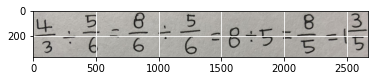

In [51]:
origin_img(d['path'][0])

In [ ]:
import pdb
pdb.set_trace()
model.eval()
results = []
for d in tqdm(test_data_loader):
    input = d["image"].to(device)
    expected = d["truth"]["encoded"].to(device)

    output = model(input, expected, False, 0.0)
    decoded_values = output.transpose(1, 2)
    _, sequence = torch.topk(decoded_values, 1, dim=1)
    sequence = sequence.squeeze(1)
    sequence_str = id_to_string(sequence, test_data_loader, do_eval=1)
    for path, predicted in zip(d["file_path"], sequence_str):
        results.append((path, predicted))

In [29]:
results

[('train_00000.jpg', '4 \\times 7 = 2 8 '),
 ('train_00001.jpg', 'a ^ { x } > q '),
 ('train_00002.jpg', '8 \\times 9 '),
 ('train_00003.jpg',
  '\\sum _ { k = 1 } ^ { n - 1 } b _ { k } = a _ { n } - a _ { 1 } '),
 ('train_00004.jpg', 'I = d q / d t '),
 ('train_00005.jpg', '\\sum \\overrightarrow { F } _ { e x t } = d '),
 ('train_00006.jpg', 'i ^ { 2 } = - 1 \\left( i = \\sqrt { - 1 } \\right) '),
 ('train_00007.jpg', '7 \\times 9 = 4 9 '),
 ('train_00008.jpg',
  'F \\left( 0 , \\sqrt { a ^ { 2 } + b ^ { 2 } } \\right) \\left( 0 , - \\sqrt { a ^ { 2 } + b ^ { 2 } \\right) '),
 ('train_00009.jpg', '\\left( a - 2 \\right) \\left( a - 3 \\right) = 0 '),
 ('train_00010.jpg', '\\therefore b = - 9 '),
 ('train_00011.jpg', '2 2 + 7 - 1 2 = '),
 ('train_00012.jpg', '7 \\div 4 '),
 ('train_00013.jpg', 'f \\left( x \\right) = 4 x ^ { 3 } '),
 ('train_00014.jpg',
  'M P _ { 2 } = \\lim _ { \\Delta l \\to 0 } \\frac { g \\left( l l \\Delta l g g g \\left( \\right) \\right) } l l } = \\frac { { d

In [22]:
print('4 \\times 7 = 2 8')

4 \times 7 = 2 8


In [31]:
%matplotlib inline
import glob
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from PIL import Image
import matplotlib.image as mpimg
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
def latex_to_img2(latex:str):
    a = latex
    ax = plt.axes([0,0,0.2,0.2]) #left,bottom,width,height
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')
    plt.text(0.3,0.5,'$%s$' %a, size=35,color="green")
    plt.show()
def origin_img(img_name:str):
    img = mpimg.imread('/opt/ml/input/data/train_dataset/images/'+img_name)
    plt.grid(True, color='w')
    plt.imshow(img)
    plt.show()

In [ ]:
latex_to_img2('x \\left. \\right) > 0')

In [ ]:
latex_to_img2('\\left. x \\right) > 0')

In [ ]:
for i, (img_name, latex) in enumerate(results):
    origin_img(img_name)
#     print(latex)
    try:
        latex_to_img2(latex)
    except:
        print(latex)